In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=None,fileName=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook,scheduler=scheduler)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    if fileName != None:
        errorFile = fileName + "_error.pdf"
        accFile = fileName + "_acc.pdf"
        fig_1.tight_layout() # This minimises whitespace around the axes. 
        fig_1.savefig(errorFile)
        fig_2.tight_layout() # This minimises whitespace around the axes. 
        fig_2.savefig(accFile)
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f318c623518>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f318c623198>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f318c623048>)


In [ ]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.0075
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,fileName='cw4_1_SGD_test_3Hidden')

learning_rate : 0.001


Epoch 1: 4.0s to complete
    error(train)=7.84e-01, acc(train)=7.55e-01, error(valid)=8.06e-01, acc(valid)=7.49e-01


Epoch 2: 4.0s to complete
    error(train)=6.13e-01, acc(train)=8.02e-01, error(valid)=6.56e-01, acc(valid)=7.90e-01


Epoch 3: 4.0s to complete
    error(train)=5.28e-01, acc(train)=8.25e-01, error(valid)=5.93e-01, acc(valid)=8.06e-01


Epoch 4: 4.1s to complete
    error(train)=4.64e-01, acc(train)=8.45e-01, error(valid)=5.44e-01, acc(valid)=8.22e-01


Epoch 5: 4.2s to complete
    error(train)=4.58e-01, acc(train)=8.45e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 6: 4.0s to complete
    error(train)=4.46e-01, acc(train)=8.45e-01, error(valid)=5.57e-01, acc(valid)=8.17e-01


Epoch 7: 4.8s to complete
    error(train)=4.03e-01, acc(train)=8.60e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


Epoch 8: 4.7s to complete
    error(train)=4.06e-01, acc(train)=8.59e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


Epoch 9: 4.3s to complete
    error(train)=3.74e-01, acc(train)=8.68e-01, error(valid)=5.30e-01, acc(valid)=8.34e-01


Epoch 10: 4.4s to complete
    error(train)=3.56e-01, acc(train)=8.72e-01, error(valid)=5.34e-01, acc(valid)=8.31e-01


Epoch 11: 4.4s to complete
    error(train)=3.51e-01, acc(train)=8.74e-01, error(valid)=5.39e-01, acc(valid)=8.33e-01


Epoch 12: 4.4s to complete
    error(train)=3.40e-01, acc(train)=8.75e-01, error(valid)=5.41e-01, acc(valid)=8.34e-01


Epoch 13: 4.4s to complete
    error(train)=3.35e-01, acc(train)=8.78e-01, error(valid)=5.55e-01, acc(valid)=8.29e-01


Epoch 14: 4.4s to complete
    error(train)=3.33e-01, acc(train)=8.79e-01, error(valid)=5.70e-01, acc(valid)=8.31e-01


Epoch 15: 4.4s to complete
    error(train)=3.08e-01, acc(train)=8.87e-01, error(valid)=5.49e-01, acc(valid)=8.32e-01


Epoch 16: 4.4s to complete
    error(train)=3.35e-01, acc(train)=8.78e-01, error(valid)=6.22e-01, acc(valid)=8.28e-01


Epoch 17: 4.4s to complete
    error(train)=3.03e-01, acc(train)=8.88e-01, error(valid)=5.79e-01, acc(valid)=8.35e-01


Epoch 18: 4.3s to complete
    error(train)=3.02e-01, acc(train)=8.89e-01, error(valid)=5.89e-01, acc(valid)=8.32e-01


Epoch 19: 4.3s to complete
    error(train)=3.09e-01, acc(train)=8.87e-01, error(valid)=6.20e-01, acc(valid)=8.33e-01


Epoch 20: 4.3s to complete
    error(train)=2.97e-01, acc(train)=8.90e-01, error(valid)=6.14e-01, acc(valid)=8.30e-01


Epoch 21: 4.4s to complete
    error(train)=2.83e-01, acc(train)=8.91e-01, error(valid)=6.22e-01, acc(valid)=8.30e-01


Epoch 22: 4.4s to complete
    error(train)=2.84e-01, acc(train)=8.94e-01, error(valid)=6.58e-01, acc(valid)=8.28e-01


Epoch 23: 4.3s to complete
    error(train)=3.04e-01, acc(train)=8.87e-01, error(valid)=6.94e-01, acc(valid)=8.24e-01


Epoch 24: 4.3s to complete
    error(train)=2.95e-01, acc(train)=8.91e-01, error(valid)=6.83e-01, acc(valid)=8.27e-01


Epoch 25: 4.2s to complete
    error(train)=2.81e-01, acc(train)=8.96e-01, error(valid)=7.00e-01, acc(valid)=8.31e-01


Epoch 26: 4.2s to complete
    error(train)=2.91e-01, acc(train)=8.90e-01, error(valid)=6.91e-01, acc(valid)=8.20e-01


Epoch 27: 4.3s to complete
    error(train)=2.70e-01, acc(train)=8.99e-01, error(valid)=7.19e-01, acc(valid)=8.29e-01


Epoch 28: 4.2s to complete
    error(train)=2.81e-01, acc(train)=8.95e-01, error(valid)=7.49e-01, acc(valid)=8.28e-01


Epoch 29: 4.2s to complete
    error(train)=2.72e-01, acc(train)=8.98e-01, error(valid)=7.44e-01, acc(valid)=8.25e-01


Epoch 30: 4.2s to complete
    error(train)=2.87e-01, acc(train)=8.93e-01, error(valid)=7.72e-01, acc(valid)=8.23e-01


Epoch 31: 4.2s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=8.65e-01, acc(valid)=8.23e-01


Epoch 32: 4.2s to complete
    error(train)=2.90e-01, acc(train)=8.91e-01, error(valid)=7.88e-01, acc(valid)=8.16e-01


Epoch 33: 4.2s to complete
    error(train)=2.81e-01, acc(train)=8.95e-01, error(valid)=7.90e-01, acc(valid)=8.23e-01


Epoch 34: 4.2s to complete
    error(train)=2.81e-01, acc(train)=8.95e-01, error(valid)=8.44e-01, acc(valid)=8.17e-01


Epoch 35: 4.3s to complete
    error(train)=2.90e-01, acc(train)=8.96e-01, error(valid)=9.38e-01, acc(valid)=8.16e-01


Epoch 36: 4.2s to complete
    error(train)=2.69e-01, acc(train)=9.01e-01, error(valid)=8.69e-01, acc(valid)=8.25e-01


Epoch 37: 4.4s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=8.87e-01, acc(valid)=8.14e-01


Epoch 38: 4.6s to complete
    error(train)=3.22e-01, acc(train)=8.84e-01, error(valid)=9.47e-01, acc(valid)=8.06e-01


Epoch 39: 5.2s to complete
    error(train)=2.72e-01, acc(train)=8.98e-01, error(valid)=8.92e-01, acc(valid)=8.17e-01


Epoch 40: 4.2s to complete
    error(train)=2.93e-01, acc(train)=8.92e-01, error(valid)=9.28e-01, acc(valid)=8.15e-01


Epoch 41: 4.2s to complete
    error(train)=2.70e-01, acc(train)=9.00e-01, error(valid)=9.10e-01, acc(valid)=8.18e-01


Epoch 42: 4.2s to complete
    error(train)=3.20e-01, acc(train)=8.96e-01, error(valid)=1.11e+00, acc(valid)=8.19e-01


Epoch 43: 4.3s to complete
    error(train)=2.90e-01, acc(train)=8.93e-01, error(valid)=9.52e-01, acc(valid)=8.12e-01


Epoch 44: 4.3s to complete
    error(train)=3.01e-01, acc(train)=8.90e-01, error(valid)=9.48e-01, acc(valid)=8.11e-01


Epoch 45: 4.3s to complete
    error(train)=2.76e-01, acc(train)=9.03e-01, error(valid)=1.09e+00, acc(valid)=8.21e-01


Epoch 46: 4.3s to complete
    error(train)=3.12e-01, acc(train)=8.92e-01, error(valid)=1.11e+00, acc(valid)=8.13e-01


Epoch 47: 4.3s to complete
    error(train)=2.98e-01, acc(train)=8.98e-01, error(valid)=1.13e+00, acc(valid)=8.16e-01


Epoch 48: 4.3s to complete
    error(train)=3.04e-01, acc(train)=8.87e-01, error(valid)=9.73e-01, acc(valid)=8.06e-01


Epoch 49: 4.3s to complete
    error(train)=2.96e-01, acc(train)=8.92e-01, error(valid)=9.96e-01, acc(valid)=8.09e-01


Epoch 50: 4.3s to complete
    error(train)=2.95e-01, acc(train)=8.93e-01, error(valid)=1.04e+00, acc(valid)=8.11e-01


Epoch 51: 4.3s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=1.14e+00, acc(valid)=8.16e-01


Epoch 52: 4.3s to complete
    error(train)=3.09e-01, acc(train)=8.86e-01, error(valid)=1.04e+00, acc(valid)=8.07e-01


Epoch 53: 4.3s to complete
    error(train)=2.89e-01, acc(train)=8.99e-01, error(valid)=1.19e+00, acc(valid)=8.16e-01


Epoch 54: 4.3s to complete
    error(train)=2.97e-01, acc(train)=8.97e-01, error(valid)=1.15e+00, acc(valid)=8.11e-01


Epoch 55: 4.3s to complete
    error(train)=2.91e-01, acc(train)=8.98e-01, error(valid)=1.21e+00, acc(valid)=8.18e-01


Epoch 56: 4.3s to complete
    error(train)=2.98e-01, acc(train)=8.97e-01, error(valid)=1.18e+00, acc(valid)=8.14e-01


Epoch 57: 4.3s to complete
    error(train)=3.01e-01, acc(train)=8.89e-01, error(valid)=1.07e+00, acc(valid)=8.07e-01


Epoch 58: 4.3s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=1.16e+00, acc(valid)=8.09e-01


Epoch 59: 4.3s to complete
    error(train)=3.08e-01, acc(train)=8.89e-01, error(valid)=1.16e+00, acc(valid)=8.05e-01


Epoch 60: 4.3s to complete
    error(train)=3.39e-01, acc(train)=8.88e-01, error(valid)=1.36e+00, acc(valid)=8.05e-01


Epoch 61: 4.3s to complete
    error(train)=2.70e-01, acc(train)=9.03e-01, error(valid)=1.28e+00, acc(valid)=8.15e-01


Epoch 62: 4.3s to complete
    error(train)=3.29e-01, acc(train)=8.91e-01, error(valid)=1.40e+00, acc(valid)=8.08e-01


Epoch 63: 4.3s to complete
    error(train)=2.85e-01, acc(train)=9.00e-01, error(valid)=1.34e+00, acc(valid)=8.09e-01


Epoch 64: 4.3s to complete
    error(train)=2.92e-01, acc(train)=9.00e-01, error(valid)=1.34e+00, acc(valid)=8.17e-01


Epoch 65: 4.3s to complete
    error(train)=2.99e-01, acc(train)=9.02e-01, error(valid)=1.47e+00, acc(valid)=8.17e-01


Epoch 66: 4.3s to complete
    error(train)=3.13e-01, acc(train)=8.91e-01, error(valid)=1.33e+00, acc(valid)=8.08e-01


Epoch 67: 4.3s to complete
    error(train)=3.12e-01, acc(train)=8.93e-01, error(valid)=1.45e+00, acc(valid)=8.05e-01


Epoch 68: 4.2s to complete
    error(train)=2.98e-01, acc(train)=8.95e-01, error(valid)=1.35e+00, acc(valid)=8.08e-01


Epoch 69: 4.3s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=1.37e+00, acc(valid)=8.02e-01


Epoch 70: 4.2s to complete
    error(train)=3.03e-01, acc(train)=8.93e-01, error(valid)=1.30e+00, acc(valid)=8.05e-01


Epoch 71: 4.2s to complete
    error(train)=3.04e-01, acc(train)=8.99e-01, error(valid)=1.56e+00, acc(valid)=8.11e-01


Epoch 72: 4.2s to complete
    error(train)=3.28e-01, acc(train)=8.99e-01, error(valid)=1.68e+00, acc(valid)=8.11e-01


Epoch 73: 4.2s to complete
    error(train)=3.45e-01, acc(train)=8.88e-01, error(valid)=1.46e+00, acc(valid)=8.04e-01


Epoch 74: 4.3s to complete
    error(train)=3.04e-01, acc(train)=8.95e-01, error(valid)=1.46e+00, acc(valid)=8.06e-01


Epoch 75: 4.3s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=1.49e+00, acc(valid)=8.04e-01


Epoch 76: 4.3s to complete
    error(train)=3.12e-01, acc(train)=8.95e-01, error(valid)=1.44e+00, acc(valid)=8.09e-01


Epoch 77: 4.3s to complete
    error(train)=3.26e-01, acc(train)=8.95e-01, error(valid)=1.62e+00, acc(valid)=8.07e-01


Epoch 78: 4.3s to complete
    error(train)=3.12e-01, acc(train)=8.96e-01, error(valid)=1.61e+00, acc(valid)=8.05e-01


Epoch 79: 4.2s to complete
    error(train)=3.10e-01, acc(train)=8.97e-01, error(valid)=1.69e+00, acc(valid)=8.09e-01


Epoch 80: 4.3s to complete
    error(train)=3.13e-01, acc(train)=8.90e-01, error(valid)=1.54e+00, acc(valid)=8.01e-01


Epoch 81: 4.2s to complete
    error(train)=3.34e-01, acc(train)=8.94e-01, error(valid)=1.78e+00, acc(valid)=8.03e-01


Epoch 82: 4.2s to complete
    error(train)=3.23e-01, acc(train)=8.97e-01, error(valid)=1.68e+00, acc(valid)=8.11e-01


Epoch 83: 4.3s to complete
    error(train)=3.22e-01, acc(train)=9.00e-01, error(valid)=1.76e+00, acc(valid)=8.13e-01


Epoch 84: 4.3s to complete
    error(train)=2.99e-01, acc(train)=9.01e-01, error(valid)=1.72e+00, acc(valid)=8.12e-01


Epoch 85: 4.3s to complete
    error(train)=3.17e-01, acc(train)=8.94e-01, error(valid)=1.70e+00, acc(valid)=8.02e-01


Epoch 86: 4.2s to complete
    error(train)=3.23e-01, acc(train)=8.97e-01, error(valid)=1.76e+00, acc(valid)=8.04e-01


Epoch 87: 4.2s to complete
    error(train)=3.42e-01, acc(train)=8.86e-01, error(valid)=1.65e+00, acc(valid)=8.01e-01


Epoch 88: 4.2s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=1.58e+00, acc(valid)=7.90e-01


Epoch 89: 4.2s to complete
    error(train)=3.45e-01, acc(train)=8.89e-01, error(valid)=1.76e+00, acc(valid)=8.03e-01


Epoch 90: 4.2s to complete
    error(train)=3.17e-01, acc(train)=8.97e-01, error(valid)=1.86e+00, acc(valid)=8.06e-01


Epoch 91: 4.4s to complete
    error(train)=3.35e-01, acc(train)=8.88e-01, error(valid)=1.68e+00, acc(valid)=8.01e-01


Epoch 92: 4.5s to complete
    error(train)=3.12e-01, acc(train)=8.98e-01, error(valid)=1.83e+00, acc(valid)=8.08e-01


Epoch 93: 4.7s to complete
    error(train)=3.61e-01, acc(train)=8.91e-01, error(valid)=1.99e+00, acc(valid)=7.98e-01


Epoch 94: 4.2s to complete
    error(train)=3.35e-01, acc(train)=8.91e-01, error(valid)=1.77e+00, acc(valid)=8.00e-01


Epoch 95: 4.2s to complete
    error(train)=3.53e-01, acc(train)=8.91e-01, error(valid)=1.90e+00, acc(valid)=7.99e-01


Epoch 96: 4.2s to complete
    error(train)=3.25e-01, acc(train)=8.93e-01, error(valid)=1.91e+00, acc(valid)=7.99e-01


Epoch 97: 4.2s to complete
    error(train)=3.22e-01, acc(train)=8.97e-01, error(valid)=2.01e+00, acc(valid)=8.06e-01


Epoch 98: 4.3s to complete
    error(train)=3.79e-01, acc(train)=8.94e-01, error(valid)=2.19e+00, acc(valid)=8.04e-01


Epoch 99: 4.3s to complete
    error(train)=3.16e-01, acc(train)=8.95e-01, error(valid)=1.94e+00, acc(valid)=8.03e-01


Epoch 100: 4.3s to complete
    error(train)=3.60e-01, acc(train)=8.90e-01, error(valid)=2.20e+00, acc(valid)=8.03e-01



learning_rate : 0.0005


Epoch 1: 3.9s to complete
    error(train)=9.86e-01, acc(train)=7.10e-01, error(valid)=1.00e+00, acc(valid)=7.04e-01


Epoch 2: 3.9s to complete
    error(train)=7.57e-01, acc(train)=7.68e-01, error(valid)=7.80e-01, acc(valid)=7.61e-01


Epoch 3: 3.9s to complete
    error(train)=6.49e-01, acc(train)=7.97e-01, error(valid)=6.88e-01, acc(valid)=7.85e-01


Epoch 4: 3.9s to complete
    error(train)=5.81e-01, acc(train)=8.15e-01, error(valid)=6.31e-01, acc(valid)=8.04e-01


Epoch 5: 3.9s to complete
    error(train)=5.35e-01, acc(train)=8.26e-01, error(valid)=5.96e-01, acc(valid)=8.08e-01


Epoch 6: 3.9s to complete
    error(train)=5.00e-01, acc(train)=8.33e-01, error(valid)=5.72e-01, acc(valid)=8.14e-01


Epoch 7: 4.0s to complete
    error(train)=4.92e-01, acc(train)=8.36e-01, error(valid)=5.78e-01, acc(valid)=8.14e-01


Epoch 8: 4.2s to complete
    error(train)=4.82e-01, acc(train)=8.38e-01, error(valid)=5.79e-01, acc(valid)=8.13e-01


Epoch 9: 4.2s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


Epoch 10: 4.2s to complete
    error(train)=4.23e-01, acc(train)=8.57e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 11: 4.2s to complete
    error(train)=4.11e-01, acc(train)=8.58e-01, error(valid)=5.36e-01, acc(valid)=8.25e-01


Epoch 12: 4.2s to complete
    error(train)=3.94e-01, acc(train)=8.66e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 13: 4.2s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 14: 4.2s to complete
    error(train)=3.66e-01, acc(train)=8.74e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 15: 4.3s to complete
    error(train)=3.62e-01, acc(train)=8.72e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 16: 4.3s to complete
    error(train)=3.51e-01, acc(train)=8.77e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 17: 4.3s to complete
    error(train)=3.41e-01, acc(train)=8.79e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 18: 4.3s to complete
    error(train)=3.45e-01, acc(train)=8.79e-01, error(valid)=5.32e-01, acc(valid)=8.34e-01


Epoch 19: 4.3s to complete
    error(train)=3.30e-01, acc(train)=8.83e-01, error(valid)=5.33e-01, acc(valid)=8.32e-01


Epoch 20: 4.3s to complete
    error(train)=3.24e-01, acc(train)=8.84e-01, error(valid)=5.35e-01, acc(valid)=8.33e-01


Epoch 21: 4.3s to complete
    error(train)=3.17e-01, acc(train)=8.86e-01, error(valid)=5.36e-01, acc(valid)=8.35e-01


Epoch 22: 4.3s to complete
    error(train)=3.14e-01, acc(train)=8.88e-01, error(valid)=5.47e-01, acc(valid)=8.31e-01


Epoch 23: 4.3s to complete
    error(train)=3.00e-01, acc(train)=8.91e-01, error(valid)=5.42e-01, acc(valid)=8.33e-01


Epoch 24: 4.3s to complete
    error(train)=3.03e-01, acc(train)=8.91e-01, error(valid)=5.59e-01, acc(valid)=8.33e-01


Epoch 25: 4.3s to complete
    error(train)=2.94e-01, acc(train)=8.93e-01, error(valid)=5.62e-01, acc(valid)=8.31e-01


Epoch 26: 4.3s to complete
    error(train)=2.85e-01, acc(train)=8.96e-01, error(valid)=5.56e-01, acc(valid)=8.31e-01


Epoch 27: 4.3s to complete
    error(train)=2.77e-01, acc(train)=8.99e-01, error(valid)=5.59e-01, acc(valid)=8.34e-01


Epoch 28: 4.3s to complete
    error(train)=2.77e-01, acc(train)=8.99e-01, error(valid)=5.70e-01, acc(valid)=8.31e-01


Epoch 29: 4.3s to complete
    error(train)=2.84e-01, acc(train)=8.96e-01, error(valid)=5.79e-01, acc(valid)=8.31e-01


Epoch 30: 4.3s to complete
    error(train)=2.69e-01, acc(train)=9.02e-01, error(valid)=5.82e-01, acc(valid)=8.32e-01


Epoch 31: 4.3s to complete
    error(train)=2.68e-01, acc(train)=9.00e-01, error(valid)=5.97e-01, acc(valid)=8.31e-01


Epoch 32: 4.3s to complete
    error(train)=2.62e-01, acc(train)=9.02e-01, error(valid)=5.96e-01, acc(valid)=8.30e-01


Epoch 33: 4.3s to complete
    error(train)=2.59e-01, acc(train)=9.04e-01, error(valid)=6.14e-01, acc(valid)=8.31e-01


Epoch 34: 4.3s to complete
    error(train)=2.63e-01, acc(train)=9.02e-01, error(valid)=6.18e-01, acc(valid)=8.28e-01


Epoch 35: 4.3s to complete
    error(train)=2.49e-01, acc(train)=9.08e-01, error(valid)=6.17e-01, acc(valid)=8.28e-01


Epoch 36: 4.3s to complete
    error(train)=2.49e-01, acc(train)=9.08e-01, error(valid)=6.17e-01, acc(valid)=8.27e-01


Epoch 37: 4.4s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=6.32e-01, acc(valid)=8.26e-01


Epoch 38: 4.3s to complete
    error(train)=2.34e-01, acc(train)=9.13e-01, error(valid)=6.30e-01, acc(valid)=8.29e-01


Epoch 39: 4.3s to complete
    error(train)=2.28e-01, acc(train)=9.15e-01, error(valid)=6.32e-01, acc(valid)=8.28e-01


Epoch 40: 4.3s to complete
    error(train)=2.34e-01, acc(train)=9.12e-01, error(valid)=6.46e-01, acc(valid)=8.26e-01


Epoch 41: 4.3s to complete
    error(train)=2.37e-01, acc(train)=9.10e-01, error(valid)=6.69e-01, acc(valid)=8.25e-01


Epoch 42: 4.3s to complete
    error(train)=2.26e-01, acc(train)=9.15e-01, error(valid)=6.75e-01, acc(valid)=8.25e-01


Epoch 43: 4.4s to complete
    error(train)=2.52e-01, acc(train)=9.05e-01, error(valid)=6.97e-01, acc(valid)=8.25e-01


Epoch 44: 4.3s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=6.76e-01, acc(valid)=8.28e-01


Epoch 45: 4.5s to complete
    error(train)=2.17e-01, acc(train)=9.18e-01, error(valid)=6.91e-01, acc(valid)=8.30e-01


Epoch 46: 4.4s to complete
    error(train)=2.18e-01, acc(train)=9.18e-01, error(valid)=7.14e-01, acc(valid)=8.27e-01


Epoch 47: 4.6s to complete
    error(train)=2.08e-01, acc(train)=9.22e-01, error(valid)=7.15e-01, acc(valid)=8.26e-01


Epoch 48: 4.2s to complete
    error(train)=2.15e-01, acc(train)=9.17e-01, error(valid)=7.18e-01, acc(valid)=8.27e-01


Epoch 49: 4.2s to complete
    error(train)=2.24e-01, acc(train)=9.13e-01, error(valid)=7.49e-01, acc(valid)=8.20e-01


Epoch 50: 4.2s to complete
    error(train)=2.24e-01, acc(train)=9.14e-01, error(valid)=7.40e-01, acc(valid)=8.20e-01


Epoch 51: 4.1s to complete
    error(train)=2.06e-01, acc(train)=9.20e-01, error(valid)=7.45e-01, acc(valid)=8.24e-01


Epoch 52: 4.0s to complete
    error(train)=2.18e-01, acc(train)=9.15e-01, error(valid)=7.68e-01, acc(valid)=8.16e-01


Epoch 53: 4.2s to complete
    error(train)=2.05e-01, acc(train)=9.21e-01, error(valid)=7.82e-01, acc(valid)=8.22e-01


Epoch 54: 4.0s to complete
    error(train)=2.00e-01, acc(train)=9.24e-01, error(valid)=7.64e-01, acc(valid)=8.21e-01


Epoch 55: 4.1s to complete
    error(train)=1.93e-01, acc(train)=9.26e-01, error(valid)=7.77e-01, acc(valid)=8.22e-01


Epoch 56: 4.1s to complete
    error(train)=1.96e-01, acc(train)=9.24e-01, error(valid)=8.00e-01, acc(valid)=8.22e-01


Epoch 57: 4.1s to complete
    error(train)=1.95e-01, acc(train)=9.24e-01, error(valid)=8.20e-01, acc(valid)=8.23e-01


Epoch 58: 4.3s to complete
    error(train)=1.94e-01, acc(train)=9.24e-01, error(valid)=8.21e-01, acc(valid)=8.19e-01


Epoch 59: 4.3s to complete
    error(train)=1.93e-01, acc(train)=9.26e-01, error(valid)=8.36e-01, acc(valid)=8.19e-01


Epoch 60: 4.3s to complete
    error(train)=1.76e-01, acc(train)=9.32e-01, error(valid)=8.21e-01, acc(valid)=8.25e-01


Epoch 61: 4.3s to complete
    error(train)=1.95e-01, acc(train)=9.24e-01, error(valid)=8.64e-01, acc(valid)=8.18e-01


Epoch 62: 4.4s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=8.95e-01, acc(valid)=8.16e-01


Epoch 63: 4.3s to complete
    error(train)=1.87e-01, acc(train)=9.27e-01, error(valid)=8.89e-01, acc(valid)=8.18e-01


Epoch 64: 4.4s to complete
    error(train)=1.85e-01, acc(train)=9.28e-01, error(valid)=8.92e-01, acc(valid)=8.17e-01


Epoch 65: 4.4s to complete
    error(train)=1.92e-01, acc(train)=9.27e-01, error(valid)=9.29e-01, acc(valid)=8.21e-01


Epoch 66: 4.4s to complete
    error(train)=1.83e-01, acc(train)=9.29e-01, error(valid)=9.08e-01, acc(valid)=8.16e-01


Epoch 67: 4.4s to complete
    error(train)=1.74e-01, acc(train)=9.32e-01, error(valid)=9.19e-01, acc(valid)=8.18e-01


Epoch 68: 4.5s to complete
    error(train)=1.73e-01, acc(train)=9.31e-01, error(valid)=9.28e-01, acc(valid)=8.21e-01


Epoch 69: 4.4s to complete
    error(train)=1.71e-01, acc(train)=9.32e-01, error(valid)=9.22e-01, acc(valid)=8.18e-01


Epoch 70: 4.3s to complete
    error(train)=1.67e-01, acc(train)=9.34e-01, error(valid)=9.33e-01, acc(valid)=8.19e-01


Epoch 71: 4.5s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=9.78e-01, acc(valid)=8.16e-01


Epoch 72: 4.4s to complete
    error(train)=1.76e-01, acc(train)=9.32e-01, error(valid)=9.96e-01, acc(valid)=8.18e-01


Epoch 73: 4.4s to complete
    error(train)=1.78e-01, acc(train)=9.31e-01, error(valid)=9.94e-01, acc(valid)=8.18e-01


Epoch 74: 4.4s to complete
    error(train)=1.73e-01, acc(train)=9.31e-01, error(valid)=9.90e-01, acc(valid)=8.16e-01


Epoch 75: 4.4s to complete
    error(train)=1.64e-01, acc(train)=9.35e-01, error(valid)=9.85e-01, acc(valid)=8.17e-01


Epoch 76: 4.4s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=1.01e+00, acc(valid)=8.17e-01


Epoch 77: 4.4s to complete
    error(train)=1.74e-01, acc(train)=9.31e-01, error(valid)=1.05e+00, acc(valid)=8.15e-01


Epoch 78: 4.4s to complete
    error(train)=1.61e-01, acc(train)=9.36e-01, error(valid)=1.04e+00, acc(valid)=8.16e-01


Epoch 79: 4.4s to complete
    error(train)=1.68e-01, acc(train)=9.34e-01, error(valid)=1.05e+00, acc(valid)=8.16e-01


Epoch 80: 4.4s to complete
    error(train)=1.67e-01, acc(train)=9.34e-01, error(valid)=1.07e+00, acc(valid)=8.13e-01


Epoch 81: 4.5s to complete
    error(train)=1.66e-01, acc(train)=9.36e-01, error(valid)=1.09e+00, acc(valid)=8.13e-01


Epoch 82: 4.3s to complete
    error(train)=1.52e-01, acc(train)=9.39e-01, error(valid)=1.08e+00, acc(valid)=8.12e-01


Epoch 83: 4.4s to complete
    error(train)=1.55e-01, acc(train)=9.39e-01, error(valid)=1.09e+00, acc(valid)=8.12e-01


Epoch 84: 4.4s to complete
    error(train)=1.70e-01, acc(train)=9.34e-01, error(valid)=1.16e+00, acc(valid)=8.16e-01


Epoch 85: 4.4s to complete
    error(train)=1.66e-01, acc(train)=9.34e-01, error(valid)=1.12e+00, acc(valid)=8.11e-01


Epoch 86: 4.4s to complete
    error(train)=1.60e-01, acc(train)=9.36e-01, error(valid)=1.10e+00, acc(valid)=8.11e-01


Epoch 87: 4.4s to complete
    error(train)=1.56e-01, acc(train)=9.39e-01, error(valid)=1.17e+00, acc(valid)=8.10e-01


Epoch 88: 4.5s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=1.19e+00, acc(valid)=8.17e-01


Epoch 89: 4.5s to complete
    error(train)=1.57e-01, acc(train)=9.37e-01, error(valid)=1.16e+00, acc(valid)=8.13e-01


Epoch 90: 4.5s to complete
    error(train)=1.47e-01, acc(train)=9.42e-01, error(valid)=1.20e+00, acc(valid)=8.15e-01


Epoch 91: 4.4s to complete
    error(train)=1.51e-01, acc(train)=9.40e-01, error(valid)=1.20e+00, acc(valid)=8.12e-01


Epoch 92: 4.4s to complete
    error(train)=1.44e-01, acc(train)=9.43e-01, error(valid)=1.18e+00, acc(valid)=8.15e-01


Epoch 93: 4.4s to complete
    error(train)=1.43e-01, acc(train)=9.43e-01, error(valid)=1.21e+00, acc(valid)=8.12e-01


Epoch 94: 4.4s to complete
    error(train)=1.46e-01, acc(train)=9.42e-01, error(valid)=1.23e+00, acc(valid)=8.15e-01


Epoch 95: 4.4s to complete
    error(train)=1.39e-01, acc(train)=9.44e-01, error(valid)=1.22e+00, acc(valid)=8.12e-01


Epoch 96: 4.4s to complete
    error(train)=1.51e-01, acc(train)=9.42e-01, error(valid)=1.30e+00, acc(valid)=8.17e-01


Epoch 97: 4.4s to complete
    error(train)=1.64e-01, acc(train)=9.36e-01, error(valid)=1.29e+00, acc(valid)=8.05e-01


Epoch 98: 4.6s to complete
    error(train)=1.47e-01, acc(train)=9.42e-01, error(valid)=1.25e+00, acc(valid)=8.07e-01


Epoch 99: 5.0s to complete
    error(train)=1.43e-01, acc(train)=9.43e-01, error(valid)=1.31e+00, acc(valid)=8.13e-01


Epoch 100: 5.5s to complete
    error(train)=1.59e-01, acc(train)=9.37e-01, error(valid)=1.29e+00, acc(valid)=8.06e-01



learning_rate : 0.0001


Epoch 1: 3.9s to complete
    error(train)=1.57e+00, acc(train)=5.71e-01, error(valid)=1.57e+00, acc(valid)=5.74e-01


Epoch 2: 3.9s to complete
    error(train)=1.25e+00, acc(train)=6.48e-01, error(valid)=1.26e+00, acc(valid)=6.48e-01


Epoch 3: 3.8s to complete
    error(train)=1.12e+00, acc(train)=6.83e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


Epoch 4: 3.9s to complete
    error(train)=1.03e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


Epoch 5: 3.9s to complete
    error(train)=9.49e-01, acc(train)=7.26e-01, error(valid)=9.63e-01, acc(valid)=7.20e-01


Epoch 6: 4.0s to complete
    error(train)=8.85e-01, acc(train)=7.40e-01, error(valid)=9.04e-01, acc(valid)=7.37e-01


Epoch 7: 4.0s to complete
    error(train)=8.46e-01, acc(train)=7.49e-01, error(valid)=8.70e-01, acc(valid)=7.41e-01


Epoch 8: 4.0s to complete
    error(train)=7.99e-01, acc(train)=7.64e-01, error(valid)=8.24e-01, acc(valid)=7.55e-01


Epoch 9: 4.0s to complete
    error(train)=7.64e-01, acc(train)=7.72e-01, error(valid)=7.91e-01, acc(valid)=7.63e-01


Epoch 10: 4.0s to complete
    error(train)=7.40e-01, acc(train)=7.77e-01, error(valid)=7.69e-01, acc(valid)=7.67e-01


Epoch 11: 4.0s to complete
    error(train)=7.19e-01, acc(train)=7.83e-01, error(valid)=7.51e-01, acc(valid)=7.73e-01


Epoch 12: 4.0s to complete
    error(train)=6.95e-01, acc(train)=7.88e-01, error(valid)=7.28e-01, acc(valid)=7.77e-01


Epoch 13: 4.1s to complete
    error(train)=6.74e-01, acc(train)=7.94e-01, error(valid)=7.10e-01, acc(valid)=7.84e-01


Epoch 14: 4.1s to complete
    error(train)=6.56e-01, acc(train)=8.01e-01, error(valid)=6.95e-01, acc(valid)=7.90e-01


Epoch 15: 4.1s to complete
    error(train)=6.37e-01, acc(train)=8.04e-01, error(valid)=6.77e-01, acc(valid)=7.93e-01


Epoch 16: 4.2s to complete
    error(train)=6.20e-01, acc(train)=8.07e-01, error(valid)=6.65e-01, acc(valid)=7.96e-01


Epoch 17: 4.3s to complete
    error(train)=6.07e-01, acc(train)=8.13e-01, error(valid)=6.52e-01, acc(valid)=8.00e-01


Epoch 18: 4.2s to complete
    error(train)=5.97e-01, acc(train)=8.15e-01, error(valid)=6.46e-01, acc(valid)=8.02e-01


Epoch 19: 4.2s to complete
    error(train)=5.86e-01, acc(train)=8.17e-01, error(valid)=6.38e-01, acc(valid)=8.02e-01


Epoch 20: 4.2s to complete
    error(train)=5.73e-01, acc(train)=8.21e-01, error(valid)=6.28e-01, acc(valid)=8.06e-01


Epoch 21: 4.1s to complete
    error(train)=5.70e-01, acc(train)=8.23e-01, error(valid)=6.25e-01, acc(valid)=8.07e-01


Epoch 22: 4.0s to complete
    error(train)=5.52e-01, acc(train)=8.27e-01, error(valid)=6.12e-01, acc(valid)=8.11e-01


Epoch 23: 4.0s to complete
    error(train)=5.46e-01, acc(train)=8.30e-01, error(valid)=6.07e-01, acc(valid)=8.10e-01


Epoch 24: 3.9s to complete
    error(train)=5.45e-01, acc(train)=8.28e-01, error(valid)=6.10e-01, acc(valid)=8.07e-01


Epoch 25: 4.0s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=5.97e-01, acc(valid)=8.12e-01


Epoch 26: 3.9s to complete
    error(train)=5.21e-01, acc(train)=8.35e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 27: 4.0s to complete
    error(train)=5.15e-01, acc(train)=8.37e-01, error(valid)=5.88e-01, acc(valid)=8.15e-01


Epoch 28: 4.0s to complete
    error(train)=5.08e-01, acc(train)=8.37e-01, error(valid)=5.82e-01, acc(valid)=8.14e-01


Epoch 29: 4.0s to complete
    error(train)=5.00e-01, acc(train)=8.41e-01, error(valid)=5.76e-01, acc(valid)=8.16e-01


Epoch 30: 4.0s to complete
    error(train)=4.93e-01, acc(train)=8.43e-01, error(valid)=5.72e-01, acc(valid)=8.18e-01


Epoch 31: 4.0s to complete
    error(train)=4.87e-01, acc(train)=8.45e-01, error(valid)=5.67e-01, acc(valid)=8.19e-01


Epoch 32: 4.0s to complete
    error(train)=4.84e-01, acc(train)=8.43e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


Epoch 33: 4.0s to complete
    error(train)=4.79e-01, acc(train)=8.45e-01, error(valid)=5.62e-01, acc(valid)=8.19e-01


Epoch 34: 4.1s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


Epoch 35: 4.1s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 36: 4.1s to complete
    error(train)=4.63e-01, acc(train)=8.51e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 37: 4.1s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.56e-01, acc(valid)=8.21e-01


Epoch 38: 4.1s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


Epoch 39: 4.1s to complete
    error(train)=4.53e-01, acc(train)=8.53e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


Epoch 40: 4.1s to complete
    error(train)=4.48e-01, acc(train)=8.54e-01, error(valid)=5.46e-01, acc(valid)=8.26e-01


Epoch 41: 4.2s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


Epoch 42: 4.1s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


Epoch 43: 4.1s to complete
    error(train)=4.34e-01, acc(train)=8.58e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 44: 4.0s to complete
    error(train)=4.35e-01, acc(train)=8.56e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 45: 4.2s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


Epoch 46: 4.1s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 47: 4.1s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 48: 4.1s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.41e-01, acc(valid)=8.28e-01


Epoch 49: 4.1s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


Epoch 50: 4.1s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 51: 4.2s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


Epoch 52: 4.1s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.33e-01, acc(valid)=8.32e-01


Epoch 53: 4.1s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


Epoch 54: 4.3s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


Epoch 55: 4.5s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 56: 5.2s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


Epoch 57: 4.4s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 58: 4.1s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


Epoch 59: 4.1s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 60: 4.1s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


Epoch 61: 4.1s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 62: 4.0s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


Epoch 63: 4.0s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=5.23e-01, acc(valid)=8.35e-01


Epoch 64: 4.1s to complete
    error(train)=3.76e-01, acc(train)=8.73e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 65: 4.0s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


Epoch 66: 4.1s to complete
    error(train)=3.76e-01, acc(train)=8.73e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


Epoch 67: 4.0s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


Epoch 68: 4.0s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=5.25e-01, acc(valid)=8.34e-01


Epoch 69: 4.0s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 70: 4.0s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01


Epoch 71: 4.0s to complete
    error(train)=3.60e-01, acc(train)=8.79e-01, error(valid)=5.23e-01, acc(valid)=8.36e-01


Epoch 72: 4.0s to complete
    error(train)=3.60e-01, acc(train)=8.79e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


Epoch 73: 4.0s to complete
    error(train)=3.59e-01, acc(train)=8.80e-01, error(valid)=5.25e-01, acc(valid)=8.34e-01


Epoch 74: 4.0s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=5.28e-01, acc(valid)=8.34e-01


Epoch 75: 4.0s to complete
    error(train)=3.53e-01, acc(train)=8.81e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 76: 4.0s to complete
    error(train)=3.53e-01, acc(train)=8.81e-01, error(valid)=5.25e-01, acc(valid)=8.35e-01


Epoch 77: 4.1s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=5.31e-01, acc(valid)=8.33e-01


Epoch 78: 4.1s to complete
    error(train)=3.48e-01, acc(train)=8.81e-01, error(valid)=5.26e-01, acc(valid)=8.35e-01


Epoch 79: 4.1s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.30e-01, acc(valid)=8.34e-01


Epoch 80: 4.1s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


Epoch 81: 4.1s to complete
    error(train)=3.44e-01, acc(train)=8.83e-01, error(valid)=5.28e-01, acc(valid)=8.33e-01


Epoch 82: 4.1s to complete
    error(train)=3.44e-01, acc(train)=8.83e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


Epoch 83: 4.1s to complete
    error(train)=3.39e-01, acc(train)=8.86e-01, error(valid)=5.27e-01, acc(valid)=8.35e-01


Epoch 84: 4.1s to complete
    error(train)=3.41e-01, acc(train)=8.83e-01, error(valid)=5.31e-01, acc(valid)=8.35e-01


Epoch 85: 4.1s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


Epoch 86: 4.1s to complete
    error(train)=3.32e-01, acc(train)=8.87e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 87: 4.1s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.33e-01, acc(valid)=8.33e-01


Epoch 88: 4.2s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=5.30e-01, acc(valid)=8.34e-01


Epoch 89: 4.1s to complete
    error(train)=3.29e-01, acc(train)=8.88e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


Epoch 90: 4.1s to complete
    error(train)=3.24e-01, acc(train)=8.90e-01, error(valid)=5.24e-01, acc(valid)=8.36e-01


Epoch 91: 4.1s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.27e-01, acc(valid)=8.36e-01


Epoch 92: 4.1s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.31e-01, acc(valid)=8.35e-01


Epoch 93: 4.1s to complete
    error(train)=3.22e-01, acc(train)=8.90e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


Epoch 94: 4.1s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=5.33e-01, acc(valid)=8.33e-01


Epoch 95: 4.2s to complete
    error(train)=3.21e-01, acc(train)=8.91e-01, error(valid)=5.30e-01, acc(valid)=8.36e-01


Epoch 96: 4.0s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


Epoch 97: 4.0s to complete
    error(train)=3.16e-01, acc(train)=8.92e-01, error(valid)=5.33e-01, acc(valid)=8.34e-01


Epoch 98: 4.0s to complete
    error(train)=3.31e-01, acc(train)=8.85e-01, error(valid)=5.51e-01, acc(valid)=8.30e-01


Epoch 99: 4.1s to complete
    error(train)=3.13e-01, acc(train)=8.93e-01, error(valid)=5.33e-01, acc(valid)=8.35e-01


Epoch 100: 4.0s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=5.40e-01, acc(valid)=8.32e-01



learning_rate : 5e-05


Epoch 1: 3.9s to complete
    error(train)=2.36e+00, acc(train)=4.12e-01, error(valid)=2.36e+00, acc(valid)=4.12e-01


Epoch 2: 3.8s to complete
    error(train)=1.64e+00, acc(train)=5.62e-01, error(valid)=1.64e+00, acc(valid)=5.59e-01


Epoch 3: 3.8s to complete
    error(train)=1.40e+00, acc(train)=6.16e-01, error(valid)=1.40e+00, acc(valid)=6.09e-01


Epoch 4: 3.8s to complete
    error(train)=1.27e+00, acc(train)=6.44e-01, error(valid)=1.28e+00, acc(valid)=6.40e-01


Epoch 5: 3.9s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.19e+00, acc(valid)=6.61e-01


Epoch 6: 3.8s to complete
    error(train)=1.12e+00, acc(train)=6.83e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


Epoch 7: 4.0s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.95e-01


Epoch 8: 4.2s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


Epoch 9: 4.2s to complete
    error(train)=9.72e-01, acc(train)=7.19e-01, error(valid)=9.83e-01, acc(valid)=7.16e-01


Epoch 10: 4.5s to complete
    error(train)=9.35e-01, acc(train)=7.27e-01, error(valid)=9.48e-01, acc(valid)=7.22e-01


Epoch 11: 4.8s to complete
    error(train)=9.01e-01, acc(train)=7.37e-01, error(valid)=9.15e-01, acc(valid)=7.32e-01


Epoch 12: 5.2s to complete
    error(train)=8.73e-01, acc(train)=7.43e-01, error(valid)=8.88e-01, acc(valid)=7.39e-01


Epoch 13: 4.6s to complete
    error(train)=8.46e-01, acc(train)=7.49e-01, error(valid)=8.62e-01, acc(valid)=7.44e-01


Epoch 14: 4.3s to complete
    error(train)=8.23e-01, acc(train)=7.58e-01, error(valid)=8.40e-01, acc(valid)=7.53e-01


Epoch 15: 4.3s to complete
    error(train)=7.99e-01, acc(train)=7.62e-01, error(valid)=8.16e-01, acc(valid)=7.58e-01


Epoch 16: 4.4s to complete
    error(train)=7.82e-01, acc(train)=7.66e-01, error(valid)=7.99e-01, acc(valid)=7.62e-01


Epoch 17: 4.4s to complete
    error(train)=7.68e-01, acc(train)=7.69e-01, error(valid)=7.86e-01, acc(valid)=7.64e-01


Epoch 18: 4.3s to complete
    error(train)=7.46e-01, acc(train)=7.76e-01, error(valid)=7.65e-01, acc(valid)=7.71e-01


Epoch 19: 4.3s to complete
    error(train)=7.33e-01, acc(train)=7.79e-01, error(valid)=7.55e-01, acc(valid)=7.74e-01


Epoch 20: 4.3s to complete
    error(train)=7.18e-01, acc(train)=7.84e-01, error(valid)=7.39e-01, acc(valid)=7.78e-01


Epoch 21: 4.3s to complete
    error(train)=7.06e-01, acc(train)=7.86e-01, error(valid)=7.28e-01, acc(valid)=7.80e-01


Epoch 22: 4.3s to complete
    error(train)=6.94e-01, acc(train)=7.89e-01, error(valid)=7.16e-01, acc(valid)=7.84e-01


Epoch 23: 4.3s to complete
    error(train)=6.81e-01, acc(train)=7.92e-01, error(valid)=7.05e-01, acc(valid)=7.87e-01


Epoch 24: 4.2s to complete
    error(train)=6.71e-01, acc(train)=7.95e-01, error(valid)=6.96e-01, acc(valid)=7.89e-01


Epoch 25: 4.2s to complete
    error(train)=6.64e-01, acc(train)=7.97e-01, error(valid)=6.90e-01, acc(valid)=7.90e-01


Epoch 26: 4.2s to complete
    error(train)=6.51e-01, acc(train)=8.01e-01, error(valid)=6.77e-01, acc(valid)=7.91e-01


Epoch 27: 4.2s to complete
    error(train)=6.44e-01, acc(train)=8.01e-01, error(valid)=6.72e-01, acc(valid)=7.94e-01


Epoch 28: 4.1s to complete
    error(train)=6.34e-01, acc(train)=8.05e-01, error(valid)=6.63e-01, acc(valid)=7.95e-01


Epoch 29: 4.2s to complete
    error(train)=6.25e-01, acc(train)=8.07e-01, error(valid)=6.55e-01, acc(valid)=7.98e-01


Epoch 30: 4.2s to complete
    error(train)=6.19e-01, acc(train)=8.08e-01, error(valid)=6.51e-01, acc(valid)=7.99e-01


Epoch 31: 4.2s to complete
    error(train)=6.14e-01, acc(train)=8.10e-01, error(valid)=6.46e-01, acc(valid)=8.01e-01


Epoch 32: 4.2s to complete
    error(train)=6.05e-01, acc(train)=8.12e-01, error(valid)=6.39e-01, acc(valid)=8.02e-01


Epoch 33: 4.2s to complete
    error(train)=5.97e-01, acc(train)=8.15e-01, error(valid)=6.32e-01, acc(valid)=8.05e-01


Epoch 34: 4.2s to complete
    error(train)=5.91e-01, acc(train)=8.17e-01, error(valid)=6.27e-01, acc(valid)=8.07e-01


Epoch 35: 4.1s to complete
    error(train)=5.86e-01, acc(train)=8.18e-01, error(valid)=6.23e-01, acc(valid)=8.05e-01


Epoch 36: 4.1s to complete
    error(train)=5.79e-01, acc(train)=8.20e-01, error(valid)=6.17e-01, acc(valid)=8.08e-01


Epoch 37: 4.1s to complete
    error(train)=5.74e-01, acc(train)=8.21e-01, error(valid)=6.14e-01, acc(valid)=8.07e-01


Epoch 38: 4.2s to complete
    error(train)=5.70e-01, acc(train)=8.21e-01, error(valid)=6.12e-01, acc(valid)=8.10e-01


Epoch 39: 4.2s to complete
    error(train)=5.63e-01, acc(train)=8.24e-01, error(valid)=6.06e-01, acc(valid)=8.10e-01


Epoch 40: 4.1s to complete
    error(train)=5.59e-01, acc(train)=8.25e-01, error(valid)=6.03e-01, acc(valid)=8.12e-01


Epoch 41: 4.2s to complete
    error(train)=5.55e-01, acc(train)=8.26e-01, error(valid)=6.01e-01, acc(valid)=8.11e-01


Epoch 42: 4.1s to complete
    error(train)=5.50e-01, acc(train)=8.28e-01, error(valid)=5.95e-01, acc(valid)=8.14e-01


Epoch 43: 4.1s to complete
    error(train)=5.46e-01, acc(train)=8.28e-01, error(valid)=5.92e-01, acc(valid)=8.15e-01


Epoch 44: 4.1s to complete
    error(train)=5.40e-01, acc(train)=8.29e-01, error(valid)=5.89e-01, acc(valid)=8.14e-01


Epoch 45: 4.1s to complete
    error(train)=5.37e-01, acc(train)=8.31e-01, error(valid)=5.86e-01, acc(valid)=8.15e-01


Epoch 46: 4.1s to complete
    error(train)=5.32e-01, acc(train)=8.33e-01, error(valid)=5.83e-01, acc(valid)=8.17e-01


Epoch 47: 4.2s to complete
    error(train)=5.29e-01, acc(train)=8.33e-01, error(valid)=5.81e-01, acc(valid)=8.18e-01


Epoch 48: 4.2s to complete
    error(train)=5.25e-01, acc(train)=8.35e-01, error(valid)=5.77e-01, acc(valid)=8.17e-01


Epoch 49: 4.2s to complete
    error(train)=5.21e-01, acc(train)=8.35e-01, error(valid)=5.76e-01, acc(valid)=8.18e-01


Epoch 50: 4.2s to complete
    error(train)=5.18e-01, acc(train)=8.36e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


Epoch 51: 4.2s to complete
    error(train)=5.17e-01, acc(train)=8.35e-01, error(valid)=5.73e-01, acc(valid)=8.16e-01


Epoch 52: 4.3s to complete
    error(train)=5.14e-01, acc(train)=8.37e-01, error(valid)=5.72e-01, acc(valid)=8.20e-01


Epoch 53: 4.3s to complete
    error(train)=5.09e-01, acc(train)=8.39e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


Epoch 54: 4.4s to complete
    error(train)=5.08e-01, acc(train)=8.39e-01, error(valid)=5.67e-01, acc(valid)=8.21e-01


Epoch 55: 4.4s to complete
    error(train)=5.02e-01, acc(train)=8.40e-01, error(valid)=5.64e-01, acc(valid)=8.23e-01


Epoch 56: 4.4s to complete
    error(train)=5.00e-01, acc(train)=8.41e-01, error(valid)=5.63e-01, acc(valid)=8.23e-01


Epoch 57: 4.4s to complete
    error(train)=4.96e-01, acc(train)=8.43e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


Epoch 58: 4.4s to complete
    error(train)=4.93e-01, acc(train)=8.43e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


Epoch 59: 4.4s to complete
    error(train)=4.91e-01, acc(train)=8.44e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


Epoch 60: 4.3s to complete
    error(train)=4.87e-01, acc(train)=8.45e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


Epoch 61: 4.3s to complete
    error(train)=4.85e-01, acc(train)=8.45e-01, error(valid)=5.54e-01, acc(valid)=8.22e-01


Epoch 62: 4.3s to complete
    error(train)=4.84e-01, acc(train)=8.45e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


Epoch 63: 4.3s to complete
    error(train)=4.80e-01, acc(train)=8.47e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


Epoch 64: 4.3s to complete
    error(train)=4.78e-01, acc(train)=8.46e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 65: 4.9s to complete
    error(train)=4.76e-01, acc(train)=8.48e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 66: 6.3s to complete
    error(train)=4.74e-01, acc(train)=8.49e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


Epoch 67: 5.0s to complete
    error(train)=4.69e-01, acc(train)=8.50e-01, error(valid)=5.44e-01, acc(valid)=8.28e-01


Epoch 68: 4.3s to complete
    error(train)=4.67e-01, acc(train)=8.51e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 69: 4.3s to complete
    error(train)=4.65e-01, acc(train)=8.52e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


Epoch 70: 4.3s to complete
    error(train)=4.63e-01, acc(train)=8.52e-01, error(valid)=5.41e-01, acc(valid)=8.27e-01


Epoch 71: 4.4s to complete
    error(train)=4.61e-01, acc(train)=8.52e-01, error(valid)=5.42e-01, acc(valid)=8.29e-01


Epoch 72: 4.4s to complete
    error(train)=4.60e-01, acc(train)=8.53e-01, error(valid)=5.41e-01, acc(valid)=8.27e-01


Epoch 73: 4.4s to complete
    error(train)=4.56e-01, acc(train)=8.53e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


Epoch 74: 4.4s to complete
    error(train)=4.54e-01, acc(train)=8.55e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 75: 4.4s to complete
    error(train)=4.52e-01, acc(train)=8.55e-01, error(valid)=5.37e-01, acc(valid)=8.31e-01


Epoch 76: 4.4s to complete
    error(train)=4.51e-01, acc(train)=8.55e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


Epoch 77: 4.4s to complete
    error(train)=4.49e-01, acc(train)=8.55e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


Epoch 78: 4.3s to complete
    error(train)=4.48e-01, acc(train)=8.55e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 79: 4.4s to complete
    error(train)=4.44e-01, acc(train)=8.58e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


Epoch 80: 4.3s to complete
    error(train)=4.43e-01, acc(train)=8.57e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


Epoch 81: 4.2s to complete
    error(train)=4.40e-01, acc(train)=8.58e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


Epoch 82: 4.3s to complete
    error(train)=4.39e-01, acc(train)=8.57e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


Epoch 83: 4.2s to complete
    error(train)=4.37e-01, acc(train)=8.58e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


Epoch 84: 4.2s to complete
    error(train)=4.35e-01, acc(train)=8.59e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


Epoch 85: 4.2s to complete
    error(train)=4.32e-01, acc(train)=8.61e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 86: 4.2s to complete
    error(train)=4.33e-01, acc(train)=8.59e-01, error(valid)=5.30e-01, acc(valid)=8.28e-01


Epoch 87: 4.2s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 88: 4.2s to complete
    error(train)=4.28e-01, acc(train)=8.61e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 89: 4.3s to complete
    error(train)=4.28e-01, acc(train)=8.61e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


Epoch 90: 4.2s to complete
    error(train)=4.26e-01, acc(train)=8.61e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 91: 4.2s to complete
    error(train)=4.21e-01, acc(train)=8.64e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


Epoch 92: 4.2s to complete
    error(train)=4.22e-01, acc(train)=8.63e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


Epoch 93: 4.3s to complete
    error(train)=4.19e-01, acc(train)=8.64e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 94: 4.3s to complete
    error(train)=4.20e-01, acc(train)=8.63e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 95: 4.3s to complete
    error(train)=4.18e-01, acc(train)=8.64e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 96: 4.3s to complete
    error(train)=4.16e-01, acc(train)=8.64e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 97: 4.3s to complete
    error(train)=4.16e-01, acc(train)=8.64e-01, error(valid)=5.25e-01, acc(valid)=8.36e-01


Epoch 98: 4.3s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 99: 4.3s to complete
    error(train)=4.11e-01, acc(train)=8.66e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 100: 4.4s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.21e-01, acc(valid)=8.35e-01



learning_rate : 1e-05


Epoch 1: 4.1s to complete
    error(train)=3.71e+00, acc(train)=8.42e-02, error(valid)=3.71e+00, acc(valid)=8.24e-02


Epoch 2: 4.1s to complete
    error(train)=3.42e+00, acc(train)=1.82e-01, error(valid)=3.42e+00, acc(valid)=1.82e-01


Epoch 3: 4.1s to complete
    error(train)=3.02e+00, acc(train)=2.94e-01, error(valid)=3.01e+00, acc(valid)=2.96e-01


Epoch 4: 4.1s to complete
    error(train)=2.62e+00, acc(train)=3.75e-01, error(valid)=2.61e+00, acc(valid)=3.73e-01


Epoch 5: 4.1s to complete
    error(train)=2.30e+00, acc(train)=4.31e-01, error(valid)=2.30e+00, acc(valid)=4.29e-01


Epoch 6: 4.2s to complete
    error(train)=2.08e+00, acc(train)=4.72e-01, error(valid)=2.08e+00, acc(valid)=4.73e-01


Epoch 7: 4.1s to complete
    error(train)=1.91e+00, acc(train)=5.02e-01, error(valid)=1.91e+00, acc(valid)=5.03e-01


Epoch 8: 4.1s to complete
    error(train)=1.79e+00, acc(train)=5.29e-01, error(valid)=1.79e+00, acc(valid)=5.27e-01


Epoch 9: 4.1s to complete
    error(train)=1.69e+00, acc(train)=5.49e-01, error(valid)=1.69e+00, acc(valid)=5.45e-01


Epoch 10: 4.1s to complete
    error(train)=1.61e+00, acc(train)=5.67e-01, error(valid)=1.61e+00, acc(valid)=5.61e-01


Epoch 11: 4.1s to complete
    error(train)=1.55e+00, acc(train)=5.81e-01, error(valid)=1.55e+00, acc(valid)=5.77e-01


Epoch 12: 4.1s to complete
    error(train)=1.50e+00, acc(train)=5.92e-01, error(valid)=1.50e+00, acc(valid)=5.88e-01


Epoch 13: 4.2s to complete
    error(train)=1.46e+00, acc(train)=6.02e-01, error(valid)=1.46e+00, acc(valid)=5.97e-01


Epoch 14: 4.3s to complete
    error(train)=1.42e+00, acc(train)=6.11e-01, error(valid)=1.42e+00, acc(valid)=6.05e-01


Epoch 15: 4.3s to complete
    error(train)=1.39e+00, acc(train)=6.18e-01, error(valid)=1.39e+00, acc(valid)=6.11e-01


Epoch 16: 4.3s to complete
    error(train)=1.35e+00, acc(train)=6.26e-01, error(valid)=1.36e+00, acc(valid)=6.20e-01


Epoch 17: 4.3s to complete
    error(train)=1.33e+00, acc(train)=6.32e-01, error(valid)=1.33e+00, acc(valid)=6.27e-01


Epoch 18: 4.4s to complete
    error(train)=1.30e+00, acc(train)=6.38e-01, error(valid)=1.31e+00, acc(valid)=6.31e-01


Epoch 19: 4.7s to complete
    error(train)=1.28e+00, acc(train)=6.43e-01, error(valid)=1.29e+00, acc(valid)=6.36e-01


Epoch 20: 4.8s to complete
    error(train)=1.26e+00, acc(train)=6.48e-01, error(valid)=1.27e+00, acc(valid)=6.41e-01


Epoch 21: 4.9s to complete
    error(train)=1.24e+00, acc(train)=6.52e-01, error(valid)=1.25e+00, acc(valid)=6.45e-01


Epoch 22: 4.5s to complete
    error(train)=1.23e+00, acc(train)=6.56e-01, error(valid)=1.23e+00, acc(valid)=6.50e-01


Epoch 23: 4.5s to complete
    error(train)=1.21e+00, acc(train)=6.60e-01, error(valid)=1.22e+00, acc(valid)=6.55e-01


Epoch 24: 4.5s to complete
    error(train)=1.20e+00, acc(train)=6.64e-01, error(valid)=1.20e+00, acc(valid)=6.61e-01


Epoch 25: 4.4s to complete
    error(train)=1.18e+00, acc(train)=6.67e-01, error(valid)=1.19e+00, acc(valid)=6.64e-01


Epoch 26: 4.4s to complete
    error(train)=1.17e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.66e-01


Epoch 27: 4.5s to complete
    error(train)=1.16e+00, acc(train)=6.74e-01, error(valid)=1.16e+00, acc(valid)=6.69e-01


Epoch 28: 4.5s to complete
    error(train)=1.14e+00, acc(train)=6.78e-01, error(valid)=1.15e+00, acc(valid)=6.72e-01


Epoch 29: 4.4s to complete
    error(train)=1.13e+00, acc(train)=6.81e-01, error(valid)=1.14e+00, acc(valid)=6.76e-01


Epoch 30: 4.4s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.80e-01


Epoch 31: 4.5s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.81e-01


Epoch 32: 4.5s to complete
    error(train)=1.10e+00, acc(train)=6.89e-01, error(valid)=1.11e+00, acc(valid)=6.84e-01


Epoch 33: 4.4s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.87e-01


Epoch 34: 4.5s to complete
    error(train)=1.08e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.88e-01


Epoch 35: 4.4s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


Epoch 36: 4.4s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 37: 4.4s to complete
    error(train)=1.06e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


Epoch 38: 4.4s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


Epoch 39: 4.4s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


Epoch 40: 4.3s to complete
    error(train)=1.03e+00, acc(train)=7.07e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01


Epoch 41: 4.4s to complete
    error(train)=1.02e+00, acc(train)=7.09e-01, error(valid)=1.03e+00, acc(valid)=7.03e-01


Epoch 42: 4.3s to complete
    error(train)=1.02e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


Epoch 43: 4.4s to complete
    error(train)=1.01e+00, acc(train)=7.13e-01, error(valid)=1.02e+00, acc(valid)=7.07e-01


Epoch 44: 4.3s to complete
    error(train)=1.00e+00, acc(train)=7.15e-01, error(valid)=1.01e+00, acc(valid)=7.11e-01


Epoch 45: 4.4s to complete
    error(train)=9.94e-01, acc(train)=7.17e-01, error(valid)=1.00e+00, acc(valid)=7.12e-01


Epoch 46: 4.3s to complete
    error(train)=9.87e-01, acc(train)=7.19e-01, error(valid)=9.96e-01, acc(valid)=7.14e-01


Epoch 47: 4.4s to complete
    error(train)=9.80e-01, acc(train)=7.20e-01, error(valid)=9.89e-01, acc(valid)=7.15e-01


Epoch 48: 4.4s to complete
    error(train)=9.73e-01, acc(train)=7.22e-01, error(valid)=9.82e-01, acc(valid)=7.18e-01


Epoch 49: 4.4s to complete
    error(train)=9.67e-01, acc(train)=7.23e-01, error(valid)=9.76e-01, acc(valid)=7.21e-01


Epoch 50: 4.4s to complete
    error(train)=9.60e-01, acc(train)=7.25e-01, error(valid)=9.70e-01, acc(valid)=7.22e-01


Epoch 51: 4.4s to complete
    error(train)=9.54e-01, acc(train)=7.26e-01, error(valid)=9.64e-01, acc(valid)=7.23e-01


Epoch 52: 4.4s to complete
    error(train)=9.47e-01, acc(train)=7.29e-01, error(valid)=9.58e-01, acc(valid)=7.25e-01


Epoch 53: 4.4s to complete
    error(train)=9.42e-01, acc(train)=7.30e-01, error(valid)=9.52e-01, acc(valid)=7.26e-01


Epoch 54: 4.3s to complete
    error(train)=9.35e-01, acc(train)=7.32e-01, error(valid)=9.45e-01, acc(valid)=7.29e-01


Epoch 55: 4.4s to complete
    error(train)=9.29e-01, acc(train)=7.33e-01, error(valid)=9.40e-01, acc(valid)=7.32e-01


Epoch 56: 4.3s to complete
    error(train)=9.24e-01, acc(train)=7.35e-01, error(valid)=9.35e-01, acc(valid)=7.31e-01


Epoch 57: 4.3s to complete
    error(train)=9.18e-01, acc(train)=7.36e-01, error(valid)=9.30e-01, acc(valid)=7.32e-01


Epoch 58: 4.3s to complete
    error(train)=9.13e-01, acc(train)=7.37e-01, error(valid)=9.24e-01, acc(valid)=7.34e-01


Epoch 59: 4.3s to complete
    error(train)=9.08e-01, acc(train)=7.39e-01, error(valid)=9.20e-01, acc(valid)=7.35e-01


Epoch 60: 4.3s to complete
    error(train)=9.01e-01, acc(train)=7.40e-01, error(valid)=9.13e-01, acc(valid)=7.36e-01


Epoch 61: 4.3s to complete
    error(train)=8.96e-01, acc(train)=7.41e-01, error(valid)=9.08e-01, acc(valid)=7.38e-01


Epoch 62: 4.3s to complete
    error(train)=8.91e-01, acc(train)=7.43e-01, error(valid)=9.03e-01, acc(valid)=7.39e-01


Epoch 63: 4.3s to complete
    error(train)=8.86e-01, acc(train)=7.44e-01, error(valid)=8.98e-01, acc(valid)=7.40e-01


Epoch 64: 4.3s to complete
    error(train)=8.81e-01, acc(train)=7.45e-01, error(valid)=8.93e-01, acc(valid)=7.42e-01


Epoch 65: 4.3s to complete
    error(train)=8.76e-01, acc(train)=7.46e-01, error(valid)=8.89e-01, acc(valid)=7.42e-01


Epoch 66: 4.4s to complete
    error(train)=8.71e-01, acc(train)=7.48e-01, error(valid)=8.84e-01, acc(valid)=7.43e-01


Epoch 67: 4.4s to complete
    error(train)=8.66e-01, acc(train)=7.49e-01, error(valid)=8.80e-01, acc(valid)=7.44e-01


Epoch 68: 4.5s to complete
    error(train)=8.61e-01, acc(train)=7.50e-01, error(valid)=8.75e-01, acc(valid)=7.45e-01


Epoch 69: 4.5s to complete
    error(train)=8.57e-01, acc(train)=7.51e-01, error(valid)=8.71e-01, acc(valid)=7.46e-01


Epoch 70: 4.4s to complete
    error(train)=8.52e-01, acc(train)=7.52e-01, error(valid)=8.66e-01, acc(valid)=7.46e-01


Epoch 71: 4.4s to complete
    error(train)=8.47e-01, acc(train)=7.54e-01, error(valid)=8.62e-01, acc(valid)=7.50e-01


Epoch 72: 4.9s to complete
    error(train)=8.43e-01, acc(train)=7.54e-01, error(valid)=8.58e-01, acc(valid)=7.51e-01


Epoch 73: 5.9s to complete
    error(train)=8.39e-01, acc(train)=7.55e-01, error(valid)=8.54e-01, acc(valid)=7.51e-01


Epoch 74: 5.0s to complete
    error(train)=8.34e-01, acc(train)=7.57e-01, error(valid)=8.50e-01, acc(valid)=7.51e-01


Epoch 75: 4.6s to complete
    error(train)=8.30e-01, acc(train)=7.58e-01, error(valid)=8.46e-01, acc(valid)=7.53e-01


Epoch 76: 4.4s to complete
    error(train)=8.26e-01, acc(train)=7.59e-01, error(valid)=8.42e-01, acc(valid)=7.54e-01


Epoch 77: 4.4s to complete
    error(train)=8.22e-01, acc(train)=7.59e-01, error(valid)=8.39e-01, acc(valid)=7.55e-01


Epoch 78: 4.5s to complete
    error(train)=8.18e-01, acc(train)=7.61e-01, error(valid)=8.35e-01, acc(valid)=7.55e-01


Epoch 79: 4.5s to complete
    error(train)=8.14e-01, acc(train)=7.62e-01, error(valid)=8.31e-01, acc(valid)=7.56e-01


Epoch 80: 4.5s to complete
    error(train)=8.10e-01, acc(train)=7.62e-01, error(valid)=8.28e-01, acc(valid)=7.57e-01


Epoch 81: 4.4s to complete
    error(train)=8.06e-01, acc(train)=7.63e-01, error(valid)=8.24e-01, acc(valid)=7.57e-01


Epoch 82: 4.5s to complete
    error(train)=8.02e-01, acc(train)=7.65e-01, error(valid)=8.20e-01, acc(valid)=7.59e-01


Epoch 83: 4.5s to complete
    error(train)=7.99e-01, acc(train)=7.66e-01, error(valid)=8.17e-01, acc(valid)=7.61e-01


Epoch 84: 4.4s to complete
    error(train)=7.95e-01, acc(train)=7.66e-01, error(valid)=8.13e-01, acc(valid)=7.61e-01


Epoch 85: 4.4s to complete
    error(train)=7.91e-01, acc(train)=7.67e-01, error(valid)=8.10e-01, acc(valid)=7.61e-01


Epoch 86: 4.4s to complete
    error(train)=7.88e-01, acc(train)=7.68e-01, error(valid)=8.07e-01, acc(valid)=7.61e-01


Epoch 87: 4.4s to complete
    error(train)=7.85e-01, acc(train)=7.68e-01, error(valid)=8.04e-01, acc(valid)=7.62e-01


Epoch 88: 4.4s to complete
    error(train)=7.81e-01, acc(train)=7.70e-01, error(valid)=8.00e-01, acc(valid)=7.63e-01


Epoch 89: 4.4s to complete
    error(train)=7.78e-01, acc(train)=7.71e-01, error(valid)=7.97e-01, acc(valid)=7.64e-01


Epoch 90: 4.3s to complete
    error(train)=7.74e-01, acc(train)=7.72e-01, error(valid)=7.94e-01, acc(valid)=7.65e-01


Epoch 91: 4.4s to complete
    error(train)=7.72e-01, acc(train)=7.72e-01, error(valid)=7.92e-01, acc(valid)=7.66e-01


Epoch 92: 4.3s to complete
    error(train)=7.68e-01, acc(train)=7.73e-01, error(valid)=7.88e-01, acc(valid)=7.68e-01


Epoch 93: 4.3s to complete
    error(train)=7.65e-01, acc(train)=7.74e-01, error(valid)=7.85e-01, acc(valid)=7.68e-01


Epoch 94: 4.3s to complete
    error(train)=7.61e-01, acc(train)=7.75e-01, error(valid)=7.82e-01, acc(valid)=7.67e-01


Epoch 95: 4.4s to complete
    error(train)=7.58e-01, acc(train)=7.76e-01, error(valid)=7.80e-01, acc(valid)=7.69e-01


Epoch 96: 4.3s to complete
    error(train)=7.55e-01, acc(train)=7.76e-01, error(valid)=7.77e-01, acc(valid)=7.70e-01


Epoch 97: 4.3s to complete
    error(train)=7.52e-01, acc(train)=7.77e-01, error(valid)=7.74e-01, acc(valid)=7.69e-01


Epoch 98: 4.4s to complete
    error(train)=7.50e-01, acc(train)=7.78e-01, error(valid)=7.72e-01, acc(valid)=7.71e-01


Epoch 99: 4.3s to complete
    error(train)=7.47e-01, acc(train)=7.78e-01, error(valid)=7.69e-01, acc(valid)=7.71e-01


Epoch 100: 4.3s to complete
    error(train)=7.44e-01, acc(train)=7.78e-01, error(valid)=7.67e-01, acc(valid)=7.71e-01


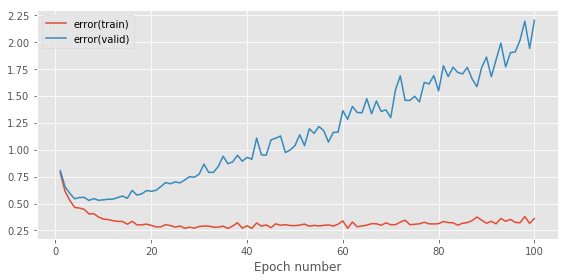

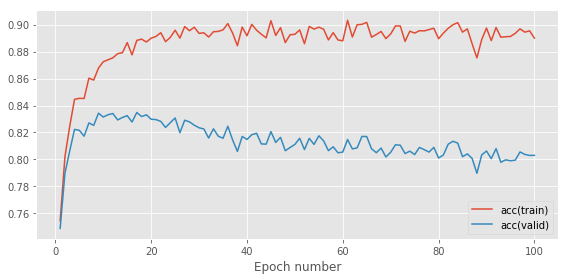

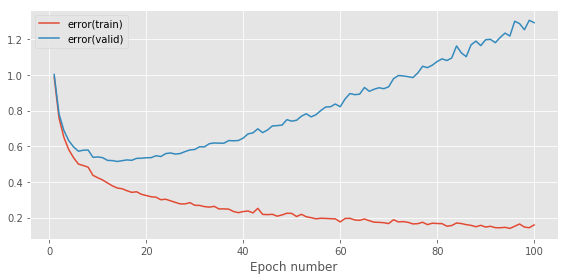

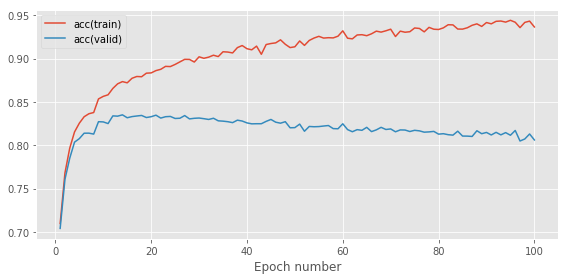

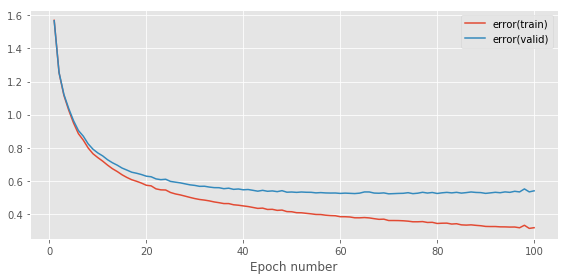

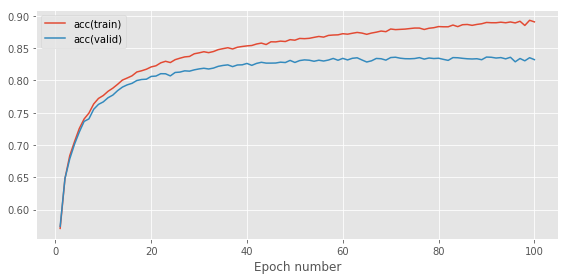

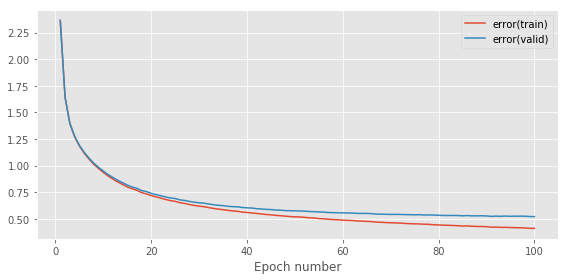

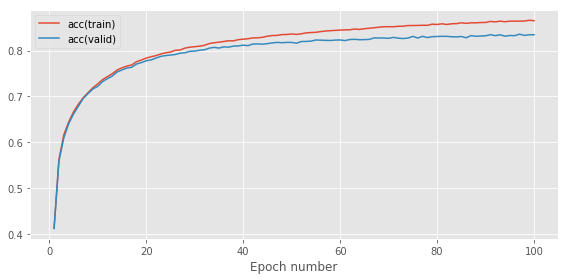

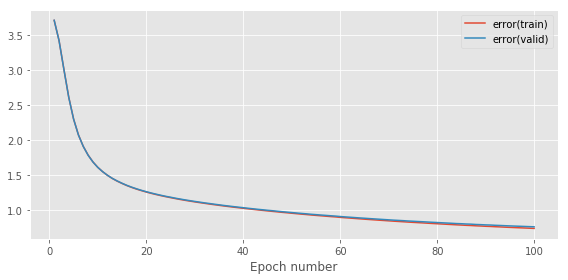

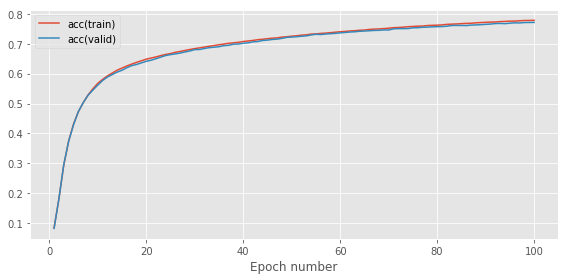

In [3]:
#RMS



from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rates = [1e-3,5e-4,1e-4,5e-5,1e-5]

file_names=[]
for learning_rate in learning_rates:
    file_name = 'cw4_2_RMS_valid_{}'.format(learning_rate)
    file_names.append(file_name)

for learning_rate,file_name in zip(learning_rates,file_names):
    
    print('learning_rate :',learning_rate)

    num_epochs = 100
    stats_interval = 1
    input_dim, output_dim, hidden_dim = 784, 47, 100

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule

    learning_rule = RMSPropLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,fileName=file_name)

learning_rate : 0.001


Epoch 1: 4.9s to complete
    error(train)=7.28e-01, acc(train)=7.73e-01, error(valid)=7.47e-01, acc(valid)=7.67e-01


Epoch 2: 4.6s to complete
    error(train)=5.97e-01, acc(train)=8.09e-01, error(valid)=6.43e-01, acc(valid)=7.98e-01


Epoch 3: 4.6s to complete
    error(train)=5.41e-01, acc(train)=8.20e-01, error(valid)=6.03e-01, acc(valid)=8.04e-01


Epoch 4: 4.7s to complete
    error(train)=4.88e-01, acc(train)=8.36e-01, error(valid)=5.63e-01, acc(valid)=8.14e-01


Epoch 5: 4.6s to complete
    error(train)=4.55e-01, acc(train)=8.43e-01, error(valid)=5.42e-01, acc(valid)=8.20e-01


Epoch 6: 4.5s to complete
    error(train)=4.16e-01, acc(train)=8.56e-01, error(valid)=5.22e-01, acc(valid)=8.27e-01


Epoch 7: 4.6s to complete
    error(train)=4.01e-01, acc(train)=8.60e-01, error(valid)=5.15e-01, acc(valid)=8.30e-01


Epoch 8: 4.7s to complete
    error(train)=4.13e-01, acc(train)=8.50e-01, error(valid)=5.43e-01, acc(valid)=8.19e-01


Epoch 9: 4.8s to complete
    error(train)=3.63e-01, acc(train)=8.69e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


Epoch 10: 4.8s to complete
    error(train)=3.53e-01, acc(train)=8.74e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


Epoch 11: 4.8s to complete
    error(train)=3.45e-01, acc(train)=8.75e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


Epoch 12: 4.9s to complete
    error(train)=3.32e-01, acc(train)=8.78e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 13: 4.9s to complete
    error(train)=3.34e-01, acc(train)=8.78e-01, error(valid)=5.30e-01, acc(valid)=8.34e-01


Epoch 14: 4.8s to complete
    error(train)=3.22e-01, acc(train)=8.80e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 15: 4.9s to complete
    error(train)=3.09e-01, acc(train)=8.85e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 16: 4.8s to complete
    error(train)=3.01e-01, acc(train)=8.85e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 17: 4.8s to complete
    error(train)=2.81e-01, acc(train)=8.96e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


Epoch 18: 5.0s to complete
    error(train)=2.83e-01, acc(train)=8.92e-01, error(valid)=5.41e-01, acc(valid)=8.33e-01


Epoch 19: 4.9s to complete
    error(train)=2.82e-01, acc(train)=8.94e-01, error(valid)=5.61e-01, acc(valid)=8.32e-01


Epoch 20: 4.9s to complete
    error(train)=2.72e-01, acc(train)=8.98e-01, error(valid)=5.39e-01, acc(valid)=8.39e-01


Epoch 21: 4.9s to complete
    error(train)=2.62e-01, acc(train)=8.99e-01, error(valid)=5.53e-01, acc(valid)=8.35e-01


Epoch 22: 5.0s to complete
    error(train)=2.67e-01, acc(train)=8.98e-01, error(valid)=5.66e-01, acc(valid)=8.34e-01


Epoch 23: 4.9s to complete
    error(train)=2.53e-01, acc(train)=9.03e-01, error(valid)=5.74e-01, acc(valid)=8.37e-01


Epoch 24: 4.9s to complete
    error(train)=2.58e-01, acc(train)=9.00e-01, error(valid)=5.95e-01, acc(valid)=8.35e-01


Epoch 25: 4.9s to complete
    error(train)=2.43e-01, acc(train)=9.05e-01, error(valid)=5.80e-01, acc(valid)=8.34e-01


Epoch 26: 4.9s to complete
    error(train)=2.44e-01, acc(train)=9.03e-01, error(valid)=5.92e-01, acc(valid)=8.28e-01


Epoch 27: 4.9s to complete
    error(train)=2.32e-01, acc(train)=9.09e-01, error(valid)=5.95e-01, acc(valid)=8.31e-01


Epoch 28: 4.9s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=6.01e-01, acc(valid)=8.33e-01


Epoch 29: 5.0s to complete
    error(train)=2.33e-01, acc(train)=9.07e-01, error(valid)=6.36e-01, acc(valid)=8.28e-01


Epoch 30: 4.9s to complete
    error(train)=2.22e-01, acc(train)=9.11e-01, error(valid)=6.25e-01, acc(valid)=8.32e-01


Epoch 31: 5.0s to complete
    error(train)=2.25e-01, acc(train)=9.09e-01, error(valid)=6.40e-01, acc(valid)=8.30e-01


Epoch 32: 5.2s to complete
    error(train)=2.17e-01, acc(train)=9.12e-01, error(valid)=6.59e-01, acc(valid)=8.28e-01


Epoch 33: 5.4s to complete
    error(train)=2.18e-01, acc(train)=9.13e-01, error(valid)=6.74e-01, acc(valid)=8.27e-01


Epoch 34: 5.7s to complete
    error(train)=2.17e-01, acc(train)=9.12e-01, error(valid)=6.89e-01, acc(valid)=8.26e-01


Epoch 35: 6.0s to complete
    error(train)=2.12e-01, acc(train)=9.14e-01, error(valid)=6.78e-01, acc(valid)=8.26e-01


Epoch 36: 5.6s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=7.06e-01, acc(valid)=8.26e-01


Epoch 37: 5.4s to complete
    error(train)=2.05e-01, acc(train)=9.16e-01, error(valid)=7.02e-01, acc(valid)=8.30e-01


Epoch 38: 5.2s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=7.07e-01, acc(valid)=8.31e-01


Epoch 39: 4.8s to complete
    error(train)=1.97e-01, acc(train)=9.19e-01, error(valid)=7.24e-01, acc(valid)=8.28e-01


Epoch 40: 4.9s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=7.06e-01, acc(valid)=8.30e-01


Epoch 41: 4.9s to complete
    error(train)=2.12e-01, acc(train)=9.14e-01, error(valid)=7.53e-01, acc(valid)=8.25e-01


Epoch 42: 4.9s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=7.42e-01, acc(valid)=8.28e-01


Epoch 43: 4.9s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=7.67e-01, acc(valid)=8.24e-01


Epoch 44: 4.9s to complete
    error(train)=1.90e-01, acc(train)=9.22e-01, error(valid)=7.87e-01, acc(valid)=8.24e-01


Epoch 45: 4.9s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=7.73e-01, acc(valid)=8.25e-01


Epoch 46: 4.9s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=8.09e-01, acc(valid)=8.24e-01


Epoch 47: 4.8s to complete
    error(train)=1.85e-01, acc(train)=9.23e-01, error(valid)=7.81e-01, acc(valid)=8.25e-01


Epoch 48: 4.9s to complete
    error(train)=1.73e-01, acc(train)=9.28e-01, error(valid)=8.05e-01, acc(valid)=8.26e-01


Epoch 49: 5.0s to complete
    error(train)=1.83e-01, acc(train)=9.25e-01, error(valid)=8.16e-01, acc(valid)=8.21e-01


Epoch 50: 4.9s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=8.71e-01, acc(valid)=8.19e-01


Epoch 51: 4.9s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=8.57e-01, acc(valid)=8.27e-01


Epoch 52: 4.9s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=8.27e-01, acc(valid)=8.27e-01


Epoch 53: 4.9s to complete
    error(train)=1.84e-01, acc(train)=9.24e-01, error(valid)=8.69e-01, acc(valid)=8.25e-01


Epoch 54: 4.9s to complete
    error(train)=1.69e-01, acc(train)=9.30e-01, error(valid)=8.71e-01, acc(valid)=8.22e-01


Epoch 55: 4.9s to complete
    error(train)=1.74e-01, acc(train)=9.28e-01, error(valid)=8.77e-01, acc(valid)=8.21e-01


Epoch 56: 4.9s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=8.99e-01, acc(valid)=8.22e-01


Epoch 57: 4.8s to complete
    error(train)=1.74e-01, acc(train)=9.28e-01, error(valid)=9.07e-01, acc(valid)=8.23e-01


Epoch 58: 4.9s to complete
    error(train)=1.67e-01, acc(train)=9.29e-01, error(valid)=9.04e-01, acc(valid)=8.21e-01


Epoch 59: 5.0s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=9.34e-01, acc(valid)=8.20e-01


Epoch 60: 4.9s to complete
    error(train)=1.68e-01, acc(train)=9.31e-01, error(valid)=9.54e-01, acc(valid)=8.19e-01


Epoch 61: 4.8s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=9.67e-01, acc(valid)=8.21e-01


Epoch 62: 4.8s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=9.70e-01, acc(valid)=8.25e-01


Epoch 63: 4.8s to complete
    error(train)=1.64e-01, acc(train)=9.32e-01, error(valid)=9.52e-01, acc(valid)=8.21e-01


Epoch 64: 4.8s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=9.73e-01, acc(valid)=8.17e-01


Epoch 65: 4.9s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=9.65e-01, acc(valid)=8.24e-01


Epoch 66: 4.8s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=1.03e+00, acc(valid)=8.19e-01


Epoch 67: 4.9s to complete
    error(train)=1.62e-01, acc(train)=9.33e-01, error(valid)=1.04e+00, acc(valid)=8.18e-01


Epoch 68: 4.9s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=1.01e+00, acc(valid)=8.23e-01


Epoch 69: 4.9s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=1.04e+00, acc(valid)=8.19e-01


Epoch 70: 4.9s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=1.07e+00, acc(valid)=8.22e-01


Epoch 71: 4.8s to complete
    error(train)=1.57e-01, acc(train)=9.35e-01, error(valid)=1.09e+00, acc(valid)=8.17e-01


Epoch 72: 4.7s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=1.09e+00, acc(valid)=8.18e-01


Epoch 73: 5.3s to complete
    error(train)=1.63e-01, acc(train)=9.35e-01, error(valid)=1.08e+00, acc(valid)=8.16e-01


Epoch 74: 5.0s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=1.09e+00, acc(valid)=8.14e-01


Epoch 75: 5.0s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=1.10e+00, acc(valid)=8.21e-01


Epoch 76: 5.0s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=1.13e+00, acc(valid)=8.20e-01


Epoch 77: 5.2s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=1.14e+00, acc(valid)=8.17e-01


Epoch 78: 5.1s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=1.16e+00, acc(valid)=8.19e-01


Epoch 79: 5.2s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=1.18e+00, acc(valid)=8.14e-01


Epoch 80: 5.1s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=1.11e+00, acc(valid)=8.21e-01


Epoch 81: 5.3s to complete
    error(train)=1.65e-01, acc(train)=9.35e-01, error(valid)=1.17e+00, acc(valid)=8.15e-01


Epoch 82: 5.5s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=1.17e+00, acc(valid)=8.19e-01


Epoch 83: 5.4s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=1.18e+00, acc(valid)=8.16e-01


Epoch 84: 4.8s to complete
    error(train)=1.58e-01, acc(train)=9.37e-01, error(valid)=1.20e+00, acc(valid)=8.20e-01


Epoch 85: 4.9s to complete
    error(train)=1.46e-01, acc(train)=9.41e-01, error(valid)=1.23e+00, acc(valid)=8.13e-01


Epoch 86: 4.9s to complete
    error(train)=1.56e-01, acc(train)=9.38e-01, error(valid)=1.23e+00, acc(valid)=8.17e-01


Epoch 87: 4.9s to complete
    error(train)=1.43e-01, acc(train)=9.40e-01, error(valid)=1.23e+00, acc(valid)=8.19e-01


Epoch 88: 4.8s to complete
    error(train)=1.44e-01, acc(train)=9.40e-01, error(valid)=1.23e+00, acc(valid)=8.15e-01


Epoch 89: 4.8s to complete
    error(train)=1.60e-01, acc(train)=9.36e-01, error(valid)=1.30e+00, acc(valid)=8.14e-01


Epoch 90: 4.8s to complete
    error(train)=1.55e-01, acc(train)=9.38e-01, error(valid)=1.24e+00, acc(valid)=8.16e-01


Epoch 91: 5.1s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=1.26e+00, acc(valid)=8.19e-01


Epoch 92: 4.9s to complete
    error(train)=1.56e-01, acc(train)=9.39e-01, error(valid)=1.31e+00, acc(valid)=8.14e-01


Epoch 93: 4.8s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=1.30e+00, acc(valid)=8.19e-01


Epoch 94: 4.8s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=1.30e+00, acc(valid)=8.18e-01


Epoch 95: 4.9s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=1.32e+00, acc(valid)=8.19e-01


Epoch 96: 5.0s to complete
    error(train)=1.27e-01, acc(train)=9.47e-01, error(valid)=1.33e+00, acc(valid)=8.19e-01


Epoch 97: 5.0s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=1.38e+00, acc(valid)=8.19e-01


Epoch 98: 4.9s to complete
    error(train)=1.48e-01, acc(train)=9.42e-01, error(valid)=1.34e+00, acc(valid)=8.19e-01


Epoch 99: 4.8s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.32e+00, acc(valid)=8.18e-01


Epoch 100: 4.9s to complete
    error(train)=1.54e-01, acc(train)=9.40e-01, error(valid)=1.39e+00, acc(valid)=8.14e-01



learning_rate : 0.0005


Epoch 1: 4.4s to complete
    error(train)=9.22e-01, acc(train)=7.28e-01, error(valid)=9.35e-01, acc(valid)=7.22e-01


Epoch 2: 4.5s to complete
    error(train)=7.27e-01, acc(train)=7.74e-01, error(valid)=7.49e-01, acc(valid)=7.72e-01


Epoch 3: 4.5s to complete
    error(train)=6.24e-01, acc(train)=8.01e-01, error(valid)=6.61e-01, acc(valid)=7.89e-01


Epoch 4: 4.6s to complete
    error(train)=5.74e-01, acc(train)=8.13e-01, error(valid)=6.27e-01, acc(valid)=7.97e-01


Epoch 5: 4.6s to complete
    error(train)=5.20e-01, acc(train)=8.30e-01, error(valid)=5.79e-01, acc(valid)=8.13e-01


Epoch 6: 4.5s to complete
    error(train)=4.99e-01, acc(train)=8.34e-01, error(valid)=5.75e-01, acc(valid)=8.11e-01


Epoch 7: 4.5s to complete
    error(train)=4.73e-01, acc(train)=8.43e-01, error(valid)=5.55e-01, acc(valid)=8.19e-01


Epoch 8: 4.6s to complete
    error(train)=4.49e-01, acc(train)=8.48e-01, error(valid)=5.42e-01, acc(valid)=8.24e-01


Epoch 9: 4.6s to complete
    error(train)=4.34e-01, acc(train)=8.52e-01, error(valid)=5.38e-01, acc(valid)=8.21e-01


Epoch 10: 5.0s to complete
    error(train)=4.14e-01, acc(train)=8.60e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 11: 4.8s to complete
    error(train)=4.08e-01, acc(train)=8.59e-01, error(valid)=5.28e-01, acc(valid)=8.27e-01


Epoch 12: 4.8s to complete
    error(train)=3.90e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 13: 4.7s to complete
    error(train)=3.70e-01, acc(train)=8.72e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 14: 4.8s to complete
    error(train)=3.65e-01, acc(train)=8.72e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 15: 4.9s to complete
    error(train)=3.66e-01, acc(train)=8.70e-01, error(valid)=5.20e-01, acc(valid)=8.29e-01


Epoch 16: 4.9s to complete
    error(train)=3.52e-01, acc(train)=8.75e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


Epoch 17: 4.9s to complete
    error(train)=3.36e-01, acc(train)=8.80e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


Epoch 18: 4.9s to complete
    error(train)=3.31e-01, acc(train)=8.81e-01, error(valid)=5.09e-01, acc(valid)=8.33e-01


Epoch 19: 4.9s to complete
    error(train)=3.27e-01, acc(train)=8.83e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 20: 4.9s to complete
    error(train)=3.18e-01, acc(train)=8.84e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 21: 4.9s to complete
    error(train)=3.10e-01, acc(train)=8.89e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 22: 4.8s to complete
    error(train)=3.13e-01, acc(train)=8.85e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


Epoch 23: 5.0s to complete
    error(train)=2.99e-01, acc(train)=8.88e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 24: 5.0s to complete
    error(train)=2.84e-01, acc(train)=8.96e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 25: 4.9s to complete
    error(train)=2.78e-01, acc(train)=8.99e-01, error(valid)=5.24e-01, acc(valid)=8.39e-01


Epoch 26: 4.9s to complete
    error(train)=2.85e-01, acc(train)=8.94e-01, error(valid)=5.33e-01, acc(valid)=8.33e-01


Epoch 27: 4.9s to complete
    error(train)=2.77e-01, acc(train)=8.97e-01, error(valid)=5.37e-01, acc(valid)=8.35e-01


Epoch 28: 4.8s to complete
    error(train)=2.63e-01, acc(train)=9.03e-01, error(valid)=5.35e-01, acc(valid)=8.37e-01


Epoch 29: 5.1s to complete
    error(train)=2.67e-01, acc(train)=9.02e-01, error(valid)=5.53e-01, acc(valid)=8.35e-01


Epoch 30: 5.3s to complete
    error(train)=2.58e-01, acc(train)=9.03e-01, error(valid)=5.53e-01, acc(valid)=8.35e-01


Epoch 31: 5.8s to complete
    error(train)=2.63e-01, acc(train)=9.00e-01, error(valid)=5.60e-01, acc(valid)=8.27e-01


Epoch 32: 5.4s to complete
    error(train)=2.52e-01, acc(train)=9.06e-01, error(valid)=5.54e-01, acc(valid)=8.34e-01


Epoch 33: 5.3s to complete
    error(train)=2.49e-01, acc(train)=9.06e-01, error(valid)=5.67e-01, acc(valid)=8.32e-01


Epoch 34: 5.3s to complete
    error(train)=2.55e-01, acc(train)=9.02e-01, error(valid)=5.85e-01, acc(valid)=8.28e-01


Epoch 35: 5.3s to complete
    error(train)=2.35e-01, acc(train)=9.11e-01, error(valid)=5.77e-01, acc(valid)=8.35e-01


Epoch 36: 5.2s to complete
    error(train)=2.34e-01, acc(train)=9.12e-01, error(valid)=5.78e-01, acc(valid)=8.33e-01


Epoch 37: 5.4s to complete
    error(train)=2.38e-01, acc(train)=9.10e-01, error(valid)=6.04e-01, acc(valid)=8.31e-01


Epoch 38: 5.1s to complete
    error(train)=2.32e-01, acc(train)=9.11e-01, error(valid)=5.89e-01, acc(valid)=8.31e-01


Epoch 39: 4.8s to complete
    error(train)=2.29e-01, acc(train)=9.12e-01, error(valid)=6.08e-01, acc(valid)=8.29e-01


Epoch 40: 4.7s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=5.99e-01, acc(valid)=8.32e-01


Epoch 41: 4.8s to complete
    error(train)=2.14e-01, acc(train)=9.16e-01, error(valid)=6.04e-01, acc(valid)=8.32e-01


Epoch 42: 4.8s to complete
    error(train)=2.11e-01, acc(train)=9.19e-01, error(valid)=6.15e-01, acc(valid)=8.32e-01


Epoch 43: 4.8s to complete
    error(train)=2.08e-01, acc(train)=9.20e-01, error(valid)=6.27e-01, acc(valid)=8.32e-01


Epoch 44: 4.7s to complete
    error(train)=2.08e-01, acc(train)=9.19e-01, error(valid)=6.24e-01, acc(valid)=8.31e-01


Epoch 45: 4.8s to complete
    error(train)=2.14e-01, acc(train)=9.16e-01, error(valid)=6.52e-01, acc(valid)=8.27e-01


Epoch 46: 4.8s to complete
    error(train)=2.07e-01, acc(train)=9.19e-01, error(valid)=6.56e-01, acc(valid)=8.28e-01


Epoch 47: 4.9s to complete
    error(train)=2.02e-01, acc(train)=9.21e-01, error(valid)=6.57e-01, acc(valid)=8.28e-01


Epoch 48: 4.8s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=6.66e-01, acc(valid)=8.25e-01


Epoch 49: 4.8s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=6.65e-01, acc(valid)=8.27e-01


Epoch 50: 4.8s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=6.63e-01, acc(valid)=8.31e-01


Epoch 51: 4.9s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=6.81e-01, acc(valid)=8.25e-01


Epoch 52: 4.9s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=7.05e-01, acc(valid)=8.21e-01


Epoch 53: 4.9s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=7.09e-01, acc(valid)=8.26e-01


Epoch 54: 4.8s to complete
    error(train)=1.86e-01, acc(train)=9.27e-01, error(valid)=7.20e-01, acc(valid)=8.28e-01


Epoch 55: 4.7s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=7.25e-01, acc(valid)=8.26e-01


Epoch 56: 4.8s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=7.34e-01, acc(valid)=8.25e-01


Epoch 57: 4.8s to complete
    error(train)=1.74e-01, acc(train)=9.30e-01, error(valid)=7.30e-01, acc(valid)=8.27e-01


Epoch 58: 4.9s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=7.59e-01, acc(valid)=8.20e-01


Epoch 59: 4.9s to complete
    error(train)=1.68e-01, acc(train)=9.33e-01, error(valid)=7.39e-01, acc(valid)=8.28e-01


Epoch 60: 4.9s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=7.60e-01, acc(valid)=8.23e-01


Epoch 61: 4.9s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=7.84e-01, acc(valid)=8.22e-01


Epoch 62: 4.8s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=7.92e-01, acc(valid)=8.20e-01


Epoch 63: 4.9s to complete
    error(train)=1.68e-01, acc(train)=9.33e-01, error(valid)=7.73e-01, acc(valid)=8.25e-01


Epoch 64: 4.9s to complete
    error(train)=1.61e-01, acc(train)=9.35e-01, error(valid)=7.81e-01, acc(valid)=8.25e-01


Epoch 65: 4.7s to complete
    error(train)=1.64e-01, acc(train)=9.34e-01, error(valid)=8.17e-01, acc(valid)=8.24e-01


Epoch 66: 4.8s to complete
    error(train)=1.55e-01, acc(train)=9.38e-01, error(valid)=8.00e-01, acc(valid)=8.24e-01


Epoch 67: 4.8s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=8.00e-01, acc(valid)=8.22e-01


Epoch 68: 4.8s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=8.27e-01, acc(valid)=8.20e-01


Epoch 69: 4.8s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=8.36e-01, acc(valid)=8.20e-01


Epoch 70: 5.0s to complete
    error(train)=1.48e-01, acc(train)=9.39e-01, error(valid)=8.32e-01, acc(valid)=8.23e-01


Epoch 71: 4.9s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=8.51e-01, acc(valid)=8.17e-01


Epoch 72: 4.8s to complete
    error(train)=1.44e-01, acc(train)=9.41e-01, error(valid)=8.57e-01, acc(valid)=8.26e-01


Epoch 73: 4.7s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=8.67e-01, acc(valid)=8.21e-01


Epoch 74: 4.8s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=8.71e-01, acc(valid)=8.18e-01


Epoch 75: 4.8s to complete
    error(train)=1.44e-01, acc(train)=9.41e-01, error(valid)=8.73e-01, acc(valid)=8.22e-01


Epoch 76: 4.6s to complete
    error(train)=1.48e-01, acc(train)=9.39e-01, error(valid)=9.07e-01, acc(valid)=8.19e-01


Epoch 77: 4.7s to complete
    error(train)=1.45e-01, acc(train)=9.40e-01, error(valid)=9.07e-01, acc(valid)=8.20e-01


Epoch 78: 5.1s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=9.20e-01, acc(valid)=8.17e-01


Epoch 79: 5.4s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=9.08e-01, acc(valid)=8.19e-01


Epoch 80: 5.2s to complete
    error(train)=1.45e-01, acc(train)=9.39e-01, error(valid)=9.41e-01, acc(valid)=8.17e-01


Epoch 81: 5.0s to complete
    error(train)=1.48e-01, acc(train)=9.39e-01, error(valid)=9.45e-01, acc(valid)=8.13e-01


Epoch 82: 4.9s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=9.38e-01, acc(valid)=8.16e-01


Epoch 83: 4.8s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=9.44e-01, acc(valid)=8.17e-01


Epoch 84: 4.9s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=9.52e-01, acc(valid)=8.20e-01


Epoch 85: 4.8s to complete
    error(train)=1.48e-01, acc(train)=9.40e-01, error(valid)=9.79e-01, acc(valid)=8.16e-01


Epoch 86: 4.7s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=9.89e-01, acc(valid)=8.18e-01


Epoch 87: 4.7s to complete
    error(train)=1.32e-01, acc(train)=9.46e-01, error(valid)=9.82e-01, acc(valid)=8.18e-01


Epoch 88: 4.8s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.00e+00, acc(valid)=8.15e-01


Epoch 89: 4.8s to complete
    error(train)=1.33e-01, acc(train)=9.44e-01, error(valid)=1.01e+00, acc(valid)=8.17e-01


Epoch 90: 4.8s to complete
    error(train)=1.27e-01, acc(train)=9.48e-01, error(valid)=1.03e+00, acc(valid)=8.17e-01


Epoch 91: 4.8s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=1.04e+00, acc(valid)=8.14e-01


Epoch 92: 4.7s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=1.06e+00, acc(valid)=8.16e-01


Epoch 93: 4.7s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=1.06e+00, acc(valid)=8.16e-01


Epoch 94: 4.7s to complete
    error(train)=1.32e-01, acc(train)=9.44e-01, error(valid)=1.06e+00, acc(valid)=8.13e-01


Epoch 95: 4.6s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=1.08e+00, acc(valid)=8.14e-01


Epoch 96: 4.6s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=1.09e+00, acc(valid)=8.16e-01


Epoch 97: 4.7s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.06e+00, acc(valid)=8.20e-01


Epoch 98: 4.7s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.07e+00, acc(valid)=8.20e-01


Epoch 99: 4.8s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=1.11e+00, acc(valid)=8.19e-01


Epoch 100: 4.8s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=1.13e+00, acc(valid)=8.17e-01



learning_rate : 0.0001


Epoch 1: 4.3s to complete
    error(train)=1.41e+00, acc(train)=6.07e-01, error(valid)=1.41e+00, acc(valid)=6.06e-01


Epoch 2: 4.2s to complete
    error(train)=1.17e+00, acc(train)=6.69e-01, error(valid)=1.18e+00, acc(valid)=6.68e-01


Epoch 3: 4.2s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.05e+00, acc(valid)=6.97e-01


Epoch 4: 4.1s to complete
    error(train)=9.57e-01, acc(train)=7.22e-01, error(valid)=9.72e-01, acc(valid)=7.17e-01


Epoch 5: 4.3s to complete
    error(train)=8.89e-01, acc(train)=7.40e-01, error(valid)=9.07e-01, acc(valid)=7.37e-01


Epoch 6: 4.3s to complete
    error(train)=8.39e-01, acc(train)=7.53e-01, error(valid)=8.59e-01, acc(valid)=7.47e-01


Epoch 7: 4.3s to complete
    error(train)=8.03e-01, acc(train)=7.60e-01, error(valid)=8.28e-01, acc(valid)=7.50e-01


Epoch 8: 4.4s to complete
    error(train)=7.63e-01, acc(train)=7.73e-01, error(valid)=7.89e-01, acc(valid)=7.64e-01


Epoch 9: 4.4s to complete
    error(train)=7.31e-01, acc(train)=7.81e-01, error(valid)=7.61e-01, acc(valid)=7.72e-01


Epoch 10: 4.4s to complete
    error(train)=7.06e-01, acc(train)=7.86e-01, error(valid)=7.37e-01, acc(valid)=7.77e-01


Epoch 11: 4.3s to complete
    error(train)=6.86e-01, acc(train)=7.92e-01, error(valid)=7.20e-01, acc(valid)=7.80e-01


Epoch 12: 4.3s to complete
    error(train)=6.64e-01, acc(train)=7.96e-01, error(valid)=6.99e-01, acc(valid)=7.86e-01


Epoch 13: 4.3s to complete
    error(train)=6.46e-01, acc(train)=8.02e-01, error(valid)=6.85e-01, acc(valid)=7.90e-01


Epoch 14: 4.4s to complete
    error(train)=6.30e-01, acc(train)=8.06e-01, error(valid)=6.74e-01, acc(valid)=7.93e-01


Epoch 15: 4.3s to complete
    error(train)=6.16e-01, acc(train)=8.09e-01, error(valid)=6.61e-01, acc(valid)=7.94e-01


Epoch 16: 4.3s to complete
    error(train)=5.99e-01, acc(train)=8.14e-01, error(valid)=6.47e-01, acc(valid)=8.01e-01


Epoch 17: 4.4s to complete
    error(train)=5.88e-01, acc(train)=8.17e-01, error(valid)=6.38e-01, acc(valid)=8.01e-01


Epoch 18: 4.4s to complete
    error(train)=5.83e-01, acc(train)=8.18e-01, error(valid)=6.34e-01, acc(valid)=8.03e-01


Epoch 19: 4.4s to complete
    error(train)=5.67e-01, acc(train)=8.22e-01, error(valid)=6.22e-01, acc(valid)=8.05e-01


Epoch 20: 4.5s to complete
    error(train)=5.57e-01, acc(train)=8.25e-01, error(valid)=6.15e-01, acc(valid)=8.09e-01


Epoch 21: 4.3s to complete
    error(train)=5.51e-01, acc(train)=8.27e-01, error(valid)=6.11e-01, acc(valid)=8.09e-01


Epoch 22: 4.4s to complete
    error(train)=5.40e-01, acc(train)=8.29e-01, error(valid)=6.04e-01, acc(valid)=8.09e-01


Epoch 23: 4.4s to complete
    error(train)=5.37e-01, acc(train)=8.29e-01, error(valid)=6.02e-01, acc(valid)=8.10e-01


Epoch 24: 4.5s to complete
    error(train)=5.26e-01, acc(train)=8.33e-01, error(valid)=5.94e-01, acc(valid)=8.13e-01


Epoch 25: 4.3s to complete
    error(train)=5.13e-01, acc(train)=8.37e-01, error(valid)=5.84e-01, acc(valid)=8.16e-01


Epoch 26: 4.3s to complete
    error(train)=5.08e-01, acc(train)=8.38e-01, error(valid)=5.82e-01, acc(valid)=8.16e-01


Epoch 27: 4.4s to complete
    error(train)=4.99e-01, acc(train)=8.40e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


Epoch 28: 4.4s to complete
    error(train)=4.99e-01, acc(train)=8.40e-01, error(valid)=5.75e-01, acc(valid)=8.20e-01


Epoch 29: 4.7s to complete
    error(train)=4.86e-01, acc(train)=8.45e-01, error(valid)=5.66e-01, acc(valid)=8.20e-01


Epoch 30: 4.8s to complete
    error(train)=4.84e-01, acc(train)=8.44e-01, error(valid)=5.67e-01, acc(valid)=8.19e-01


Epoch 31: 4.8s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


Epoch 32: 4.8s to complete
    error(train)=4.77e-01, acc(train)=8.45e-01, error(valid)=5.64e-01, acc(valid)=8.21e-01


Epoch 33: 4.8s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.57e-01, acc(valid)=8.21e-01


Epoch 34: 4.8s to complete
    error(train)=4.62e-01, acc(train)=8.50e-01, error(valid)=5.51e-01, acc(valid)=8.22e-01


Epoch 35: 4.7s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.47e-01, acc(valid)=8.25e-01


Epoch 36: 4.7s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


Epoch 37: 4.8s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=5.48e-01, acc(valid)=8.22e-01


Epoch 38: 4.7s to complete
    error(train)=4.45e-01, acc(train)=8.55e-01, error(valid)=5.42e-01, acc(valid)=8.26e-01


Epoch 39: 4.5s to complete
    error(train)=4.41e-01, acc(train)=8.55e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 40: 4.3s to complete
    error(train)=4.39e-01, acc(train)=8.57e-01, error(valid)=5.41e-01, acc(valid)=8.28e-01


Epoch 41: 4.3s to complete
    error(train)=4.35e-01, acc(train)=8.56e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 42: 4.3s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 43: 4.4s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.32e-01, acc(valid)=8.27e-01


Epoch 44: 4.5s to complete
    error(train)=4.29e-01, acc(train)=8.56e-01, error(valid)=5.41e-01, acc(valid)=8.24e-01


Epoch 45: 4.3s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


Epoch 46: 4.3s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


Epoch 47: 4.4s to complete
    error(train)=4.14e-01, acc(train)=8.62e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 48: 4.4s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


Epoch 49: 4.4s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


Epoch 50: 4.4s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


Epoch 51: 4.4s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


Epoch 52: 4.5s to complete
    error(train)=3.94e-01, acc(train)=8.70e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


Epoch 53: 4.4s to complete
    error(train)=3.94e-01, acc(train)=8.69e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 54: 4.5s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 55: 4.4s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


Epoch 56: 4.5s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 57: 4.4s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 58: 4.5s to complete
    error(train)=3.77e-01, acc(train)=8.75e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 59: 4.5s to complete
    error(train)=3.76e-01, acc(train)=8.75e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


Epoch 60: 4.5s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 61: 4.5s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 62: 4.4s to complete
    error(train)=3.72e-01, acc(train)=8.76e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 63: 4.5s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 64: 4.4s to complete
    error(train)=3.65e-01, acc(train)=8.77e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


Epoch 65: 4.3s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 66: 4.4s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


Epoch 67: 4.5s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 68: 4.5s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 69: 4.5s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 70: 4.5s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 71: 4.5s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 72: 4.4s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 73: 4.4s to complete
    error(train)=3.47e-01, acc(train)=8.82e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 74: 4.4s to complete
    error(train)=3.46e-01, acc(train)=8.82e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 75: 4.4s to complete
    error(train)=3.43e-01, acc(train)=8.82e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 76: 4.4s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 77: 4.4s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 78: 4.4s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 79: 4.4s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 80: 4.4s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 81: 4.5s to complete
    error(train)=3.30e-01, acc(train)=8.88e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 82: 4.7s to complete
    error(train)=3.32e-01, acc(train)=8.86e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 83: 5.3s to complete
    error(train)=3.26e-01, acc(train)=8.89e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 84: 4.6s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 85: 4.5s to complete
    error(train)=3.27e-01, acc(train)=8.88e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 86: 4.5s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


Epoch 87: 4.4s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


Epoch 88: 4.4s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 89: 4.5s to complete
    error(train)=3.17e-01, acc(train)=8.92e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 90: 4.5s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 91: 4.5s to complete
    error(train)=3.18e-01, acc(train)=8.91e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


Epoch 92: 4.4s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 93: 4.4s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 94: 4.4s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 95: 4.8s to complete
    error(train)=3.09e-01, acc(train)=8.94e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


Epoch 96: 4.4s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 97: 4.4s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 98: 4.9s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=5.30e-01, acc(valid)=8.33e-01


Epoch 99: 5.0s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


Epoch 100: 4.4s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01



learning_rate : 5e-05


Epoch 1: 4.3s to complete
    error(train)=1.95e+00, acc(train)=5.00e-01, error(valid)=1.95e+00, acc(valid)=4.98e-01


Epoch 2: 4.1s to complete
    error(train)=1.46e+00, acc(train)=6.01e-01, error(valid)=1.46e+00, acc(valid)=5.94e-01


Epoch 3: 4.1s to complete
    error(train)=1.29e+00, acc(train)=6.41e-01, error(valid)=1.29e+00, acc(valid)=6.34e-01


Epoch 4: 4.1s to complete
    error(train)=1.20e+00, acc(train)=6.62e-01, error(valid)=1.20e+00, acc(valid)=6.58e-01


Epoch 5: 4.5s to complete
    error(train)=1.12e+00, acc(train)=6.80e-01, error(valid)=1.13e+00, acc(valid)=6.74e-01


Epoch 6: 4.2s to complete
    error(train)=1.06e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.90e-01


Epoch 7: 4.1s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.03e+00, acc(valid)=7.05e-01


Epoch 8: 4.4s to complete
    error(train)=9.70e-01, acc(train)=7.20e-01, error(valid)=9.82e-01, acc(valid)=7.17e-01


Epoch 9: 4.4s to complete
    error(train)=9.31e-01, acc(train)=7.30e-01, error(valid)=9.44e-01, acc(valid)=7.27e-01


Epoch 10: 4.4s to complete
    error(train)=8.99e-01, acc(train)=7.36e-01, error(valid)=9.15e-01, acc(valid)=7.30e-01


Epoch 11: 4.4s to complete
    error(train)=8.66e-01, acc(train)=7.47e-01, error(valid)=8.83e-01, acc(valid)=7.42e-01


Epoch 12: 4.4s to complete
    error(train)=8.44e-01, acc(train)=7.51e-01, error(valid)=8.62e-01, acc(valid)=7.44e-01


Epoch 13: 4.4s to complete
    error(train)=8.14e-01, acc(train)=7.58e-01, error(valid)=8.33e-01, acc(valid)=7.53e-01


Epoch 14: 4.4s to complete
    error(train)=7.93e-01, acc(train)=7.64e-01, error(valid)=8.13e-01, acc(valid)=7.58e-01


Epoch 15: 4.4s to complete
    error(train)=7.74e-01, acc(train)=7.68e-01, error(valid)=7.95e-01, acc(valid)=7.62e-01


Epoch 16: 4.5s to complete
    error(train)=7.57e-01, acc(train)=7.72e-01, error(valid)=7.78e-01, acc(valid)=7.68e-01


Epoch 17: 4.5s to complete
    error(train)=7.44e-01, acc(train)=7.74e-01, error(valid)=7.67e-01, acc(valid)=7.68e-01


Epoch 18: 4.4s to complete
    error(train)=7.24e-01, acc(train)=7.80e-01, error(valid)=7.48e-01, acc(valid)=7.77e-01


Epoch 19: 4.6s to complete
    error(train)=7.09e-01, acc(train)=7.85e-01, error(valid)=7.35e-01, acc(valid)=7.79e-01


Epoch 20: 4.5s to complete
    error(train)=6.97e-01, acc(train)=7.88e-01, error(valid)=7.23e-01, acc(valid)=7.81e-01


Epoch 21: 4.5s to complete
    error(train)=6.86e-01, acc(train)=7.91e-01, error(valid)=7.12e-01, acc(valid)=7.83e-01


Epoch 22: 4.4s to complete
    error(train)=6.76e-01, acc(train)=7.93e-01, error(valid)=7.04e-01, acc(valid)=7.88e-01


Epoch 23: 4.5s to complete
    error(train)=6.61e-01, acc(train)=7.98e-01, error(valid)=6.89e-01, acc(valid)=7.91e-01


Epoch 24: 4.5s to complete
    error(train)=6.51e-01, acc(train)=8.00e-01, error(valid)=6.81e-01, acc(valid)=7.92e-01


Epoch 25: 4.6s to complete
    error(train)=6.44e-01, acc(train)=8.02e-01, error(valid)=6.76e-01, acc(valid)=7.92e-01


Epoch 26: 4.4s to complete
    error(train)=6.33e-01, acc(train)=8.06e-01, error(valid)=6.66e-01, acc(valid)=7.95e-01


Epoch 27: 4.4s to complete
    error(train)=6.27e-01, acc(train)=8.06e-01, error(valid)=6.61e-01, acc(valid)=7.98e-01


Epoch 28: 4.3s to complete
    error(train)=6.17e-01, acc(train)=8.08e-01, error(valid)=6.52e-01, acc(valid)=7.98e-01


Epoch 29: 4.4s to complete
    error(train)=6.08e-01, acc(train)=8.11e-01, error(valid)=6.45e-01, acc(valid)=7.99e-01


Epoch 30: 4.5s to complete
    error(train)=6.05e-01, acc(train)=8.12e-01, error(valid)=6.42e-01, acc(valid)=8.03e-01


Epoch 31: 4.5s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=6.37e-01, acc(valid)=8.05e-01


Epoch 32: 4.7s to complete
    error(train)=5.89e-01, acc(train)=8.16e-01, error(valid)=6.31e-01, acc(valid)=8.04e-01


Epoch 33: 4.8s to complete
    error(train)=5.82e-01, acc(train)=8.18e-01, error(valid)=6.24e-01, acc(valid)=8.05e-01


Epoch 34: 5.1s to complete
    error(train)=5.75e-01, acc(train)=8.22e-01, error(valid)=6.18e-01, acc(valid)=8.08e-01


Epoch 35: 5.8s to complete
    error(train)=5.70e-01, acc(train)=8.22e-01, error(valid)=6.15e-01, acc(valid)=8.08e-01


Epoch 36: 5.5s to complete
    error(train)=5.65e-01, acc(train)=8.22e-01, error(valid)=6.10e-01, acc(valid)=8.10e-01


Epoch 37: 4.9s to complete
    error(train)=5.58e-01, acc(train)=8.24e-01, error(valid)=6.05e-01, acc(valid)=8.11e-01


Epoch 38: 4.8s to complete
    error(train)=5.53e-01, acc(train)=8.26e-01, error(valid)=6.02e-01, acc(valid)=8.12e-01


Epoch 39: 4.5s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=5.98e-01, acc(valid)=8.15e-01


Epoch 40: 4.5s to complete
    error(train)=5.44e-01, acc(train)=8.28e-01, error(valid)=5.94e-01, acc(valid)=8.15e-01


Epoch 41: 4.4s to complete
    error(train)=5.40e-01, acc(train)=8.29e-01, error(valid)=5.93e-01, acc(valid)=8.14e-01


Epoch 42: 4.4s to complete
    error(train)=5.35e-01, acc(train)=8.31e-01, error(valid)=5.86e-01, acc(valid)=8.17e-01


Epoch 43: 4.4s to complete
    error(train)=5.31e-01, acc(train)=8.31e-01, error(valid)=5.86e-01, acc(valid)=8.16e-01


Epoch 44: 4.3s to complete
    error(train)=5.25e-01, acc(train)=8.33e-01, error(valid)=5.82e-01, acc(valid)=8.16e-01


Epoch 45: 4.5s to complete
    error(train)=5.21e-01, acc(train)=8.35e-01, error(valid)=5.78e-01, acc(valid)=8.19e-01


Epoch 46: 4.4s to complete
    error(train)=5.19e-01, acc(train)=8.36e-01, error(valid)=5.77e-01, acc(valid)=8.18e-01


Epoch 47: 4.4s to complete
    error(train)=5.15e-01, acc(train)=8.36e-01, error(valid)=5.74e-01, acc(valid)=8.19e-01


Epoch 48: 4.4s to complete
    error(train)=5.09e-01, acc(train)=8.39e-01, error(valid)=5.69e-01, acc(valid)=8.21e-01


Epoch 49: 4.6s to complete
    error(train)=5.07e-01, acc(train)=8.39e-01, error(valid)=5.68e-01, acc(valid)=8.22e-01


Epoch 50: 4.5s to complete
    error(train)=5.04e-01, acc(train)=8.39e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


Epoch 51: 4.5s to complete
    error(train)=5.01e-01, acc(train)=8.40e-01, error(valid)=5.64e-01, acc(valid)=8.21e-01


Epoch 52: 4.4s to complete
    error(train)=4.98e-01, acc(train)=8.41e-01, error(valid)=5.63e-01, acc(valid)=8.22e-01


Epoch 53: 4.4s to complete
    error(train)=4.94e-01, acc(train)=8.43e-01, error(valid)=5.61e-01, acc(valid)=8.23e-01


Epoch 54: 4.4s to complete
    error(train)=4.93e-01, acc(train)=8.43e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


Epoch 55: 4.4s to complete
    error(train)=4.89e-01, acc(train)=8.42e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 56: 4.4s to complete
    error(train)=4.85e-01, acc(train)=8.44e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


Epoch 57: 4.4s to complete
    error(train)=4.83e-01, acc(train)=8.45e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


Epoch 58: 4.5s to complete
    error(train)=4.78e-01, acc(train)=8.47e-01, error(valid)=5.50e-01, acc(valid)=8.25e-01


Epoch 59: 4.6s to complete
    error(train)=4.75e-01, acc(train)=8.48e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 60: 4.6s to complete
    error(train)=4.74e-01, acc(train)=8.47e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 61: 4.5s to complete
    error(train)=4.71e-01, acc(train)=8.49e-01, error(valid)=5.47e-01, acc(valid)=8.25e-01


Epoch 62: 4.4s to complete
    error(train)=4.67e-01, acc(train)=8.50e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


Epoch 63: 4.5s to complete
    error(train)=4.66e-01, acc(train)=8.50e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 64: 4.4s to complete
    error(train)=4.65e-01, acc(train)=8.49e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


Epoch 65: 4.9s to complete
    error(train)=4.60e-01, acc(train)=8.52e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


Epoch 66: 4.5s to complete
    error(train)=4.59e-01, acc(train)=8.52e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 67: 4.4s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


Epoch 68: 4.4s to complete
    error(train)=4.55e-01, acc(train)=8.52e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


Epoch 69: 4.5s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


Epoch 70: 4.5s to complete
    error(train)=4.50e-01, acc(train)=8.55e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


Epoch 71: 4.5s to complete
    error(train)=4.47e-01, acc(train)=8.56e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


Epoch 72: 4.5s to complete
    error(train)=4.46e-01, acc(train)=8.56e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


Epoch 73: 4.4s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


Epoch 74: 4.4s to complete
    error(train)=4.40e-01, acc(train)=8.58e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


Epoch 75: 4.4s to complete
    error(train)=4.40e-01, acc(train)=8.57e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


Epoch 76: 4.4s to complete
    error(train)=4.39e-01, acc(train)=8.57e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


Epoch 77: 4.4s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


Epoch 78: 4.4s to complete
    error(train)=4.36e-01, acc(train)=8.58e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


Epoch 79: 4.5s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 80: 4.5s to complete
    error(train)=4.27e-01, acc(train)=8.61e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 81: 4.5s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


Epoch 82: 4.4s to complete
    error(train)=4.27e-01, acc(train)=8.59e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 83: 4.3s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 84: 4.4s to complete
    error(train)=4.23e-01, acc(train)=8.61e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 85: 4.5s to complete
    error(train)=4.19e-01, acc(train)=8.63e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


Epoch 86: 4.8s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 87: 4.7s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 88: 4.7s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


Epoch 89: 4.5s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 90: 4.6s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 91: 4.5s to complete
    error(train)=4.11e-01, acc(train)=8.65e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 92: 4.5s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 93: 4.5s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 94: 4.5s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 95: 4.5s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 96: 4.5s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 97: 4.5s to complete
    error(train)=4.05e-01, acc(train)=8.67e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 98: 4.6s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 99: 4.6s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 100: 4.4s to complete
    error(train)=3.96e-01, acc(train)=8.69e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01



learning_rate : 1e-05


Epoch 1: 4.4s to complete
    error(train)=3.68e+00, acc(train)=9.50e-02, error(valid)=3.68e+00, acc(valid)=9.31e-02


Epoch 2: 4.3s to complete
    error(train)=3.19e+00, acc(train)=2.59e-01, error(valid)=3.19e+00, acc(valid)=2.60e-01


Epoch 3: 4.2s to complete
    error(train)=2.62e+00, acc(train)=3.77e-01, error(valid)=2.62e+00, acc(valid)=3.75e-01


Epoch 4: 4.2s to complete
    error(train)=2.25e+00, acc(train)=4.43e-01, error(valid)=2.24e+00, acc(valid)=4.44e-01


Epoch 5: 4.1s to complete
    error(train)=2.01e+00, acc(train)=4.87e-01, error(valid)=2.01e+00, acc(valid)=4.86e-01


Epoch 6: 4.2s to complete
    error(train)=1.84e+00, acc(train)=5.18e-01, error(valid)=1.84e+00, acc(valid)=5.18e-01


Epoch 7: 4.3s to complete
    error(train)=1.72e+00, acc(train)=5.43e-01, error(valid)=1.72e+00, acc(valid)=5.41e-01


Epoch 8: 4.2s to complete
    error(train)=1.63e+00, acc(train)=5.62e-01, error(valid)=1.63e+00, acc(valid)=5.57e-01


Epoch 9: 4.2s to complete
    error(train)=1.56e+00, acc(train)=5.78e-01, error(valid)=1.56e+00, acc(valid)=5.74e-01


Epoch 10: 4.4s to complete
    error(train)=1.51e+00, acc(train)=5.92e-01, error(valid)=1.51e+00, acc(valid)=5.86e-01


Epoch 11: 4.3s to complete
    error(train)=1.46e+00, acc(train)=6.02e-01, error(valid)=1.46e+00, acc(valid)=5.96e-01


Epoch 12: 4.5s to complete
    error(train)=1.42e+00, acc(train)=6.12e-01, error(valid)=1.42e+00, acc(valid)=6.06e-01


Epoch 13: 4.4s to complete
    error(train)=1.38e+00, acc(train)=6.19e-01, error(valid)=1.39e+00, acc(valid)=6.13e-01


Epoch 14: 4.5s to complete
    error(train)=1.35e+00, acc(train)=6.26e-01, error(valid)=1.36e+00, acc(valid)=6.19e-01


Epoch 15: 4.4s to complete
    error(train)=1.33e+00, acc(train)=6.32e-01, error(valid)=1.33e+00, acc(valid)=6.25e-01


Epoch 16: 4.5s to complete
    error(train)=1.30e+00, acc(train)=6.39e-01, error(valid)=1.30e+00, acc(valid)=6.32e-01


Epoch 17: 4.4s to complete
    error(train)=1.28e+00, acc(train)=6.45e-01, error(valid)=1.28e+00, acc(valid)=6.37e-01


Epoch 18: 4.4s to complete
    error(train)=1.26e+00, acc(train)=6.49e-01, error(valid)=1.26e+00, acc(valid)=6.42e-01


Epoch 19: 4.4s to complete
    error(train)=1.24e+00, acc(train)=6.54e-01, error(valid)=1.24e+00, acc(valid)=6.46e-01


Epoch 20: 4.5s to complete
    error(train)=1.22e+00, acc(train)=6.59e-01, error(valid)=1.23e+00, acc(valid)=6.52e-01


Epoch 21: 4.3s to complete
    error(train)=1.21e+00, acc(train)=6.63e-01, error(valid)=1.21e+00, acc(valid)=6.56e-01


Epoch 22: 4.4s to complete
    error(train)=1.19e+00, acc(train)=6.67e-01, error(valid)=1.20e+00, acc(valid)=6.61e-01


Epoch 23: 4.4s to complete
    error(train)=1.18e+00, acc(train)=6.70e-01, error(valid)=1.18e+00, acc(valid)=6.65e-01


Epoch 24: 4.4s to complete
    error(train)=1.16e+00, acc(train)=6.74e-01, error(valid)=1.17e+00, acc(valid)=6.70e-01


Epoch 25: 4.4s to complete
    error(train)=1.15e+00, acc(train)=6.76e-01, error(valid)=1.16e+00, acc(valid)=6.72e-01


Epoch 26: 4.5s to complete
    error(train)=1.14e+00, acc(train)=6.80e-01, error(valid)=1.14e+00, acc(valid)=6.77e-01


Epoch 27: 4.4s to complete
    error(train)=1.13e+00, acc(train)=6.83e-01, error(valid)=1.13e+00, acc(valid)=6.78e-01


Epoch 28: 4.5s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.12e+00, acc(valid)=6.81e-01


Epoch 29: 4.4s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.83e-01


Epoch 30: 4.4s to complete
    error(train)=1.09e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.87e-01


Epoch 31: 4.5s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.09e+00, acc(valid)=6.89e-01


Epoch 32: 4.7s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.08e+00, acc(valid)=6.92e-01


Epoch 33: 4.9s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 34: 4.9s to complete
    error(train)=1.06e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


Epoch 35: 4.9s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.06e+00, acc(valid)=6.98e-01


Epoch 36: 4.8s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.05e+00, acc(valid)=7.00e-01


Epoch 37: 5.0s to complete
    error(train)=1.03e+00, acc(train)=7.08e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01


Epoch 38: 4.9s to complete
    error(train)=1.02e+00, acc(train)=7.10e-01, error(valid)=1.03e+00, acc(valid)=7.06e-01


Epoch 39: 5.1s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.07e-01


Epoch 40: 5.1s to complete
    error(train)=1.01e+00, acc(train)=7.14e-01, error(valid)=1.02e+00, acc(valid)=7.09e-01


Epoch 41: 4.8s to complete
    error(train)=9.99e-01, acc(train)=7.15e-01, error(valid)=1.01e+00, acc(valid)=7.11e-01


Epoch 42: 4.4s to complete
    error(train)=9.92e-01, acc(train)=7.18e-01, error(valid)=1.00e+00, acc(valid)=7.13e-01


Epoch 43: 4.5s to complete
    error(train)=9.85e-01, acc(train)=7.20e-01, error(valid)=9.95e-01, acc(valid)=7.14e-01


Epoch 44: 4.5s to complete
    error(train)=9.77e-01, acc(train)=7.21e-01, error(valid)=9.88e-01, acc(valid)=7.17e-01


Epoch 45: 4.5s to complete
    error(train)=9.71e-01, acc(train)=7.23e-01, error(valid)=9.82e-01, acc(valid)=7.20e-01


Epoch 46: 4.8s to complete
    error(train)=9.64e-01, acc(train)=7.24e-01, error(valid)=9.75e-01, acc(valid)=7.20e-01


Epoch 47: 4.5s to complete
    error(train)=9.57e-01, acc(train)=7.25e-01, error(valid)=9.69e-01, acc(valid)=7.22e-01


Epoch 48: 4.6s to complete
    error(train)=9.51e-01, acc(train)=7.27e-01, error(valid)=9.62e-01, acc(valid)=7.23e-01


Epoch 49: 4.5s to complete
    error(train)=9.45e-01, acc(train)=7.29e-01, error(valid)=9.57e-01, acc(valid)=7.24e-01


Epoch 50: 4.7s to complete
    error(train)=9.38e-01, acc(train)=7.31e-01, error(valid)=9.51e-01, acc(valid)=7.25e-01


Epoch 51: 4.6s to complete
    error(train)=9.32e-01, acc(train)=7.32e-01, error(valid)=9.45e-01, acc(valid)=7.27e-01


Epoch 52: 4.6s to complete
    error(train)=9.26e-01, acc(train)=7.34e-01, error(valid)=9.39e-01, acc(valid)=7.29e-01


Epoch 53: 4.7s to complete
    error(train)=9.21e-01, acc(train)=7.35e-01, error(valid)=9.34e-01, acc(valid)=7.31e-01


Epoch 54: 4.6s to complete
    error(train)=9.15e-01, acc(train)=7.37e-01, error(valid)=9.28e-01, acc(valid)=7.32e-01


Epoch 55: 4.6s to complete
    error(train)=9.09e-01, acc(train)=7.38e-01, error(valid)=9.23e-01, acc(valid)=7.34e-01


Epoch 56: 4.5s to complete
    error(train)=9.04e-01, acc(train)=7.40e-01, error(valid)=9.17e-01, acc(valid)=7.34e-01


Epoch 57: 4.5s to complete
    error(train)=8.98e-01, acc(train)=7.40e-01, error(valid)=9.12e-01, acc(valid)=7.35e-01


Epoch 58: 4.6s to complete
    error(train)=8.93e-01, acc(train)=7.42e-01, error(valid)=9.08e-01, acc(valid)=7.37e-01


Epoch 59: 4.6s to complete
    error(train)=8.88e-01, acc(train)=7.43e-01, error(valid)=9.03e-01, acc(valid)=7.38e-01


Epoch 60: 4.7s to complete
    error(train)=8.82e-01, acc(train)=7.45e-01, error(valid)=8.97e-01, acc(valid)=7.40e-01


Epoch 61: 4.6s to complete
    error(train)=8.77e-01, acc(train)=7.46e-01, error(valid)=8.92e-01, acc(valid)=7.42e-01


Epoch 62: 4.6s to complete
    error(train)=8.72e-01, acc(train)=7.47e-01, error(valid)=8.88e-01, acc(valid)=7.42e-01


Epoch 63: 4.5s to complete
    error(train)=8.67e-01, acc(train)=7.48e-01, error(valid)=8.83e-01, acc(valid)=7.44e-01


Epoch 64: 4.6s to complete
    error(train)=8.63e-01, acc(train)=7.49e-01, error(valid)=8.79e-01, acc(valid)=7.45e-01


Epoch 65: 4.5s to complete
    error(train)=8.58e-01, acc(train)=7.50e-01, error(valid)=8.75e-01, acc(valid)=7.47e-01


Epoch 66: 4.8s to complete
    error(train)=8.53e-01, acc(train)=7.52e-01, error(valid)=8.70e-01, acc(valid)=7.47e-01


Epoch 67: 4.5s to complete
    error(train)=8.49e-01, acc(train)=7.52e-01, error(valid)=8.66e-01, acc(valid)=7.49e-01


Epoch 68: 4.4s to complete
    error(train)=8.44e-01, acc(train)=7.53e-01, error(valid)=8.62e-01, acc(valid)=7.48e-01


Epoch 69: 4.4s to complete
    error(train)=8.40e-01, acc(train)=7.55e-01, error(valid)=8.58e-01, acc(valid)=7.50e-01


Epoch 70: 4.6s to complete
    error(train)=8.36e-01, acc(train)=7.56e-01, error(valid)=8.53e-01, acc(valid)=7.52e-01


Epoch 71: 4.5s to complete
    error(train)=8.31e-01, acc(train)=7.57e-01, error(valid)=8.50e-01, acc(valid)=7.53e-01


Epoch 72: 4.5s to complete
    error(train)=8.27e-01, acc(train)=7.57e-01, error(valid)=8.46e-01, acc(valid)=7.53e-01


Epoch 73: 4.4s to complete
    error(train)=8.23e-01, acc(train)=7.59e-01, error(valid)=8.42e-01, acc(valid)=7.55e-01


Epoch 74: 4.4s to complete
    error(train)=8.19e-01, acc(train)=7.60e-01, error(valid)=8.38e-01, acc(valid)=7.55e-01


Epoch 75: 4.4s to complete
    error(train)=8.16e-01, acc(train)=7.61e-01, error(valid)=8.35e-01, acc(valid)=7.56e-01


Epoch 76: 4.3s to complete
    error(train)=8.12e-01, acc(train)=7.62e-01, error(valid)=8.31e-01, acc(valid)=7.57e-01


Epoch 77: 4.5s to complete
    error(train)=8.08e-01, acc(train)=7.63e-01, error(valid)=8.28e-01, acc(valid)=7.58e-01


Epoch 78: 4.4s to complete
    error(train)=8.04e-01, acc(train)=7.63e-01, error(valid)=8.25e-01, acc(valid)=7.59e-01


Epoch 79: 4.4s to complete
    error(train)=8.00e-01, acc(train)=7.64e-01, error(valid)=8.21e-01, acc(valid)=7.60e-01


Epoch 80: 4.5s to complete
    error(train)=7.97e-01, acc(train)=7.65e-01, error(valid)=8.18e-01, acc(valid)=7.60e-01


Epoch 81: 4.5s to complete
    error(train)=7.93e-01, acc(train)=7.66e-01, error(valid)=8.14e-01, acc(valid)=7.61e-01


Epoch 82: 4.5s to complete
    error(train)=7.90e-01, acc(train)=7.67e-01, error(valid)=8.11e-01, acc(valid)=7.61e-01


Epoch 83: 4.4s to complete
    error(train)=7.86e-01, acc(train)=7.69e-01, error(valid)=8.08e-01, acc(valid)=7.62e-01


Epoch 84: 4.4s to complete
    error(train)=7.82e-01, acc(train)=7.70e-01, error(valid)=8.04e-01, acc(valid)=7.64e-01


Epoch 85: 4.3s to complete
    error(train)=7.79e-01, acc(train)=7.70e-01, error(valid)=8.02e-01, acc(valid)=7.64e-01


Epoch 86: 4.5s to complete
    error(train)=7.76e-01, acc(train)=7.70e-01, error(valid)=7.98e-01, acc(valid)=7.65e-01


Epoch 87: 4.5s to complete
    error(train)=7.73e-01, acc(train)=7.71e-01, error(valid)=7.96e-01, acc(valid)=7.63e-01


Epoch 88: 4.4s to complete
    error(train)=7.69e-01, acc(train)=7.72e-01, error(valid)=7.92e-01, acc(valid)=7.65e-01


Epoch 89: 4.4s to complete
    error(train)=7.66e-01, acc(train)=7.73e-01, error(valid)=7.90e-01, acc(valid)=7.67e-01


Epoch 90: 4.8s to complete
    error(train)=7.63e-01, acc(train)=7.74e-01, error(valid)=7.87e-01, acc(valid)=7.68e-01


Epoch 91: 4.8s to complete
    error(train)=7.60e-01, acc(train)=7.75e-01, error(valid)=7.85e-01, acc(valid)=7.66e-01


Epoch 92: 5.2s to complete
    error(train)=7.57e-01, acc(train)=7.75e-01, error(valid)=7.81e-01, acc(valid)=7.68e-01


Epoch 93: 4.6s to complete
    error(train)=7.54e-01, acc(train)=7.76e-01, error(valid)=7.79e-01, acc(valid)=7.68e-01


Epoch 94: 4.4s to complete
    error(train)=7.51e-01, acc(train)=7.76e-01, error(valid)=7.76e-01, acc(valid)=7.69e-01


Epoch 95: 4.5s to complete
    error(train)=7.48e-01, acc(train)=7.78e-01, error(valid)=7.74e-01, acc(valid)=7.71e-01


Epoch 96: 4.5s to complete
    error(train)=7.45e-01, acc(train)=7.78e-01, error(valid)=7.70e-01, acc(valid)=7.71e-01


Epoch 97: 4.4s to complete
    error(train)=7.42e-01, acc(train)=7.79e-01, error(valid)=7.68e-01, acc(valid)=7.71e-01


Epoch 98: 4.4s to complete
    error(train)=7.40e-01, acc(train)=7.80e-01, error(valid)=7.66e-01, acc(valid)=7.72e-01


Epoch 99: 4.5s to complete
    error(train)=7.37e-01, acc(train)=7.80e-01, error(valid)=7.63e-01, acc(valid)=7.72e-01


Epoch 100: 4.5s to complete
    error(train)=7.34e-01, acc(train)=7.81e-01, error(valid)=7.61e-01, acc(valid)=7.73e-01


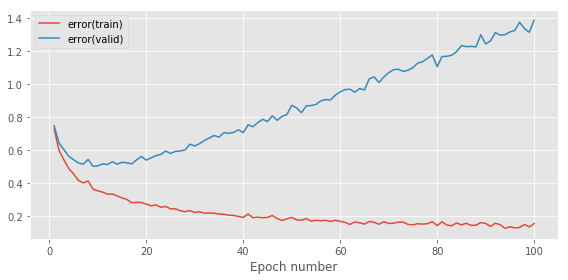

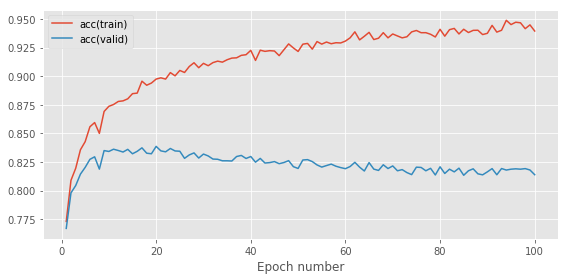

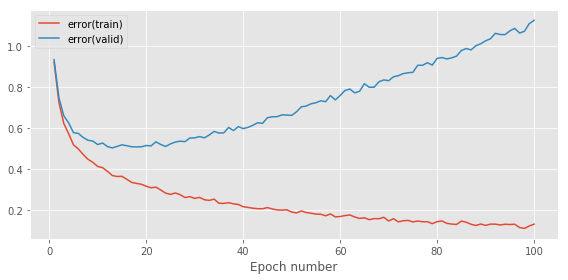

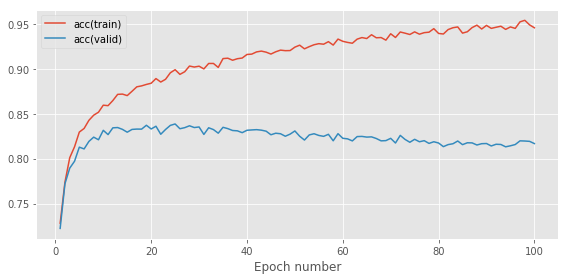

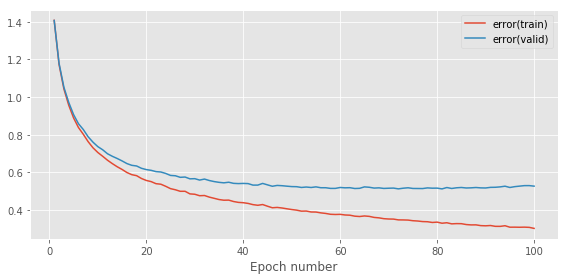

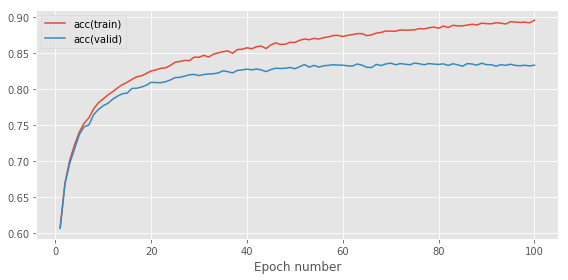

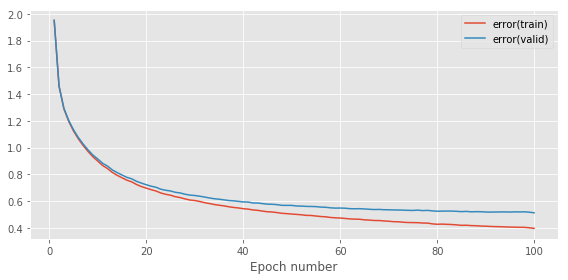

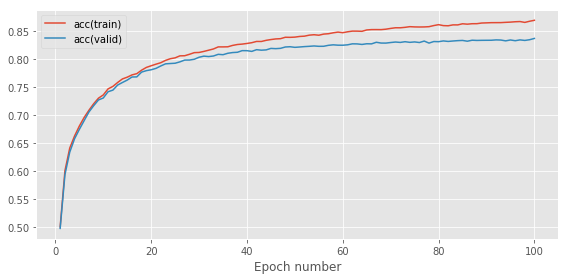

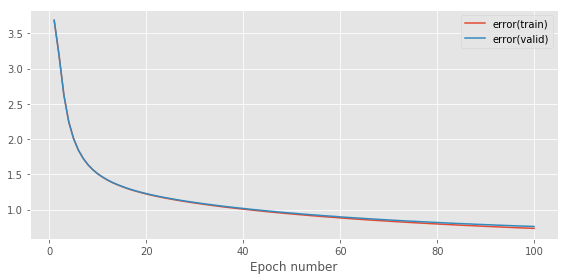

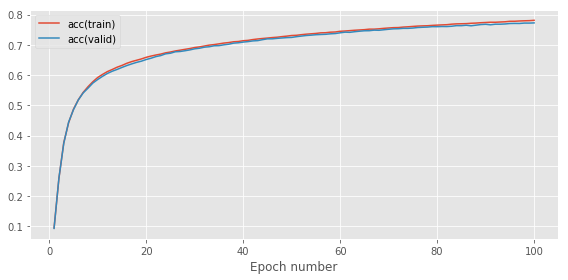

In [3]:
#Adam



from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rates = [1e-3,5e-4,1e-4,5e-5,1e-5]

file_names=[]
for learning_rate in learning_rates:
    file_name = 'cw4_2_Adam_valid_{}'.format(learning_rate)
    file_names.append(file_name)

for learning_rate,file_name in zip(learning_rates,file_names):
    
    print('learning_rate :',learning_rate)

    num_epochs = 100
    stats_interval = 1
    input_dim, output_dim, hidden_dim = 784, 47, 100

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule

    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,fileName=file_name)